# Lead Scoring Case Study [Logistic Regression]

## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel: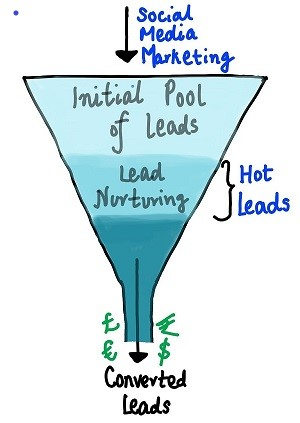

Lead Conversion Process - Demonstrated as a funnel As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Steps we are doing for this analysis are:

<b>1. Reading and Analysing Data.</b>

<b>2. Cleaning Data And Performing EDA.</b>

<b>3. Data Preparation</b>

<b>4. Splitting Data and Creating Training and Testing Models.</b>

<b>5. Scaling all Features.</b>

<b>6. Looking For Correlations Between each Variable.</b>

<b>7. Model Building On Train Set</b>

<b>8. Feature Selection Using RFE</b>

<b>9. Plotting the ROC Curve</b>

<b>10.Finding Optimal Cutoff Point </b>
           
<b>11.Making Predictions on Test Model</b>

In [1]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import precision_score, recall_score

# Step1 -  Reading and Analysing Data

In [2]:
# Reading CSV file
leadData = pd.read_csv('Leads.csv')
leadData.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
# analysing shape
leadData.shape

(9240, 37)

In [4]:
# analysing information of datatype
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# analysing size of data
leadData.size

341880

# Step2 - Cleaning Data And Performing EDA

### Checking for missing values

Fetching records for null values more than 40% which can be droped using dropna().</br>
Fetching records for null values less than or equal to 40% which can be filled up by fillna method and substitute suitable values and further cleaned .

In [6]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
leadData = leadData.replace('Select', np.nan)

In [7]:
# fetching all columns having any null values
null_vals_list = leadData.columns[(leadData.isnull().any())].tolist()

In [8]:
## To check the percentgae of null values present in each column of our dataset
for i in null_vals_list:
    print(i,"\t",leadData[i].isnull().sum()/int(leadData.shape[0]) *100.0)    

Lead Source 	 0.38961038961038963
TotalVisits 	 1.4826839826839828
Page Views Per Visit 	 1.4826839826839828
Last Activity 	 1.1147186147186148
Country 	 26.634199134199132
Specialization 	 36.58008658008658
How did you hear about X Education 	 78.46320346320347
What is your current occupation 	 29.11255411255411
What matters most to you in choosing a course 	 29.318181818181817
Tags 	 36.28787878787879
Lead Quality 	 51.590909090909086
Lead Profile 	 74.18831168831169
City 	 39.70779220779221
Asymmetrique Activity Index 	 45.64935064935065
Asymmetrique Profile Index 	 45.64935064935065
Asymmetrique Activity Score 	 45.64935064935065
Asymmetrique Profile Score 	 45.64935064935065


In [9]:
# creating 2 list 1 more than 40% null value and 2 less than 40%
# we will drop for more than 40%
# we will check for null value less than 40% ,using fillna method we will substitute value.
col_to_drop=[]
col_to_fill=[]
for i in null_vals_list:
     val = leadData[i].isnull().sum()/int(leadData.shape[0]) *100.0
     if val > 40  :
        col_to_drop.append(i)
     elif val <= 40 :
        col_to_fill.append(i)    

In [10]:
# List of columns to drop
col_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
# List of columns to drop
col_to_fill

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

#### Before dropping we do EDA visualization on these columns

#### 1. Lead Quality

In [12]:
# List of unique values and their counts
leadData['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [13]:
#Checking for null
leadData['Lead Quality'].isnull().sum()

#replacing NaN's with Not Sure
leadData['Lead Quality'] = leadData['Lead Quality'].replace(np.NaN,'Not Sure')

#describing data
leadData['Lead Quality'].describe()

count         9240
unique           5
top       Not Sure
freq          5859
Name: Lead Quality, dtype: object

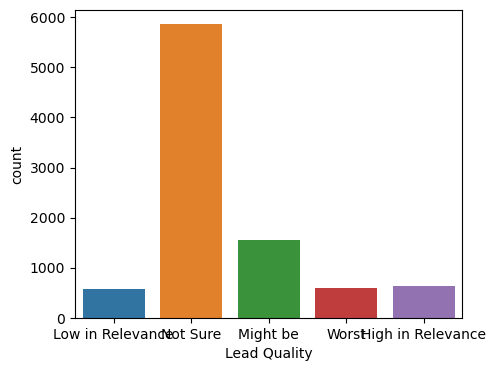

In [14]:
# visualising Lead Quality we are doing Univariate Analysis.
plt.figure(figsize=(5,4))
sns.countplot(x =leadData['Lead Quality'], data = leadData)
plt.show()

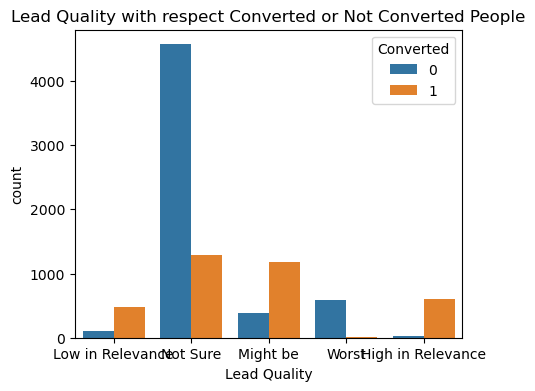

In [15]:
# visualising Lead Quality with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(5,4))
sns.countplot(data=leadData,x=leadData['Lead Quality'],hue="Converted")
plt.title('Lead Quality with respect Converted or Not Converted People')
plt.show()

##### INSIGHTS: </br>
As we know <b><u> Converted column </u></b> is our Target Column on the basis of which we are analysing,Majority of Lead is <b><u>Not sure </u></b> whether they will convert or not.But Lead with <b><u>High in Relevance </u></b> is majorly get converted.


#### 2. Lead Profile

In [16]:
# List of unique values and their counts
leadData['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

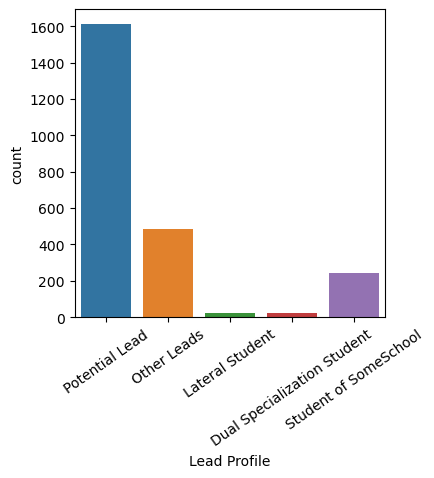

In [17]:
# visualising Lead Profile we are doing Univariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(x =leadData['Lead Profile'], data = leadData)
plt.xticks(rotation = 35)
plt.show()

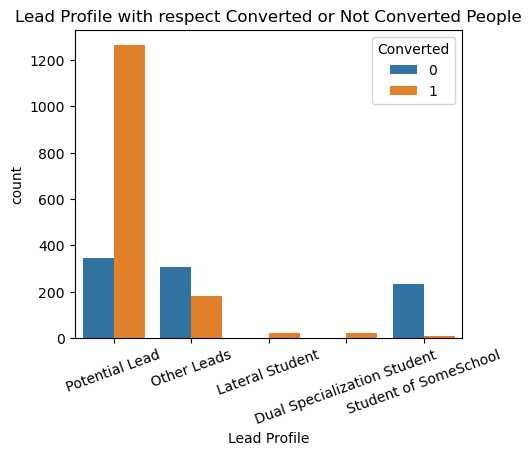

In [18]:
# visualising Lead Profile with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(5,4))
sns.countplot(data=leadData,x=leadData['Lead Profile'],hue="Converted")
plt.title('Lead Profile with respect Converted or Not Converted People')
plt.xticks(rotation=20)
plt.show()

##### INSIGHTS: </br>
As we know <b><u> Converted column </u></b> is our Target Column on the basis of which we are analysing,<b><u> Potential Lead</u></b>
are more likely to be converted than others.

#### 3. hear about X Education

In [19]:
# List of unique values and their counts
leadData['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

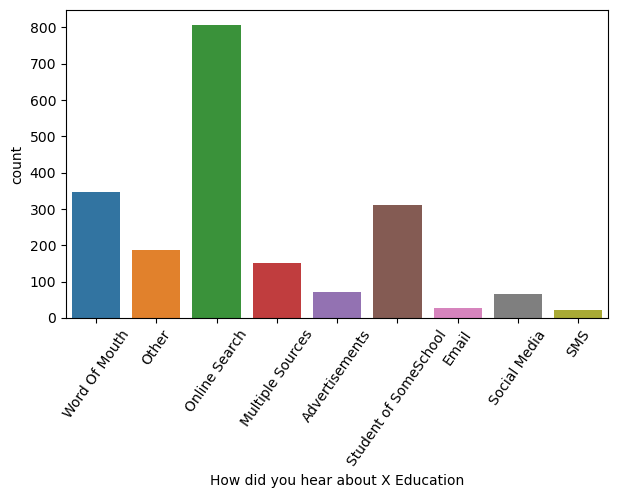

In [20]:
# visualising How you hear about X Education we are doing Univariate Analysis.
plt.figure(figsize=(7,4))
sns.countplot(x =leadData['How did you hear about X Education'], data = leadData)
plt.xticks(rotation = 55)
plt.show()

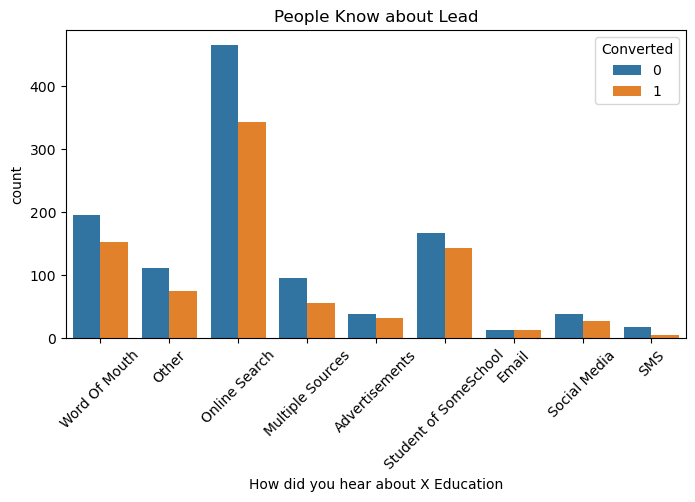

In [21]:
# visualising How you hear about X Education' with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(8,4))
sns.countplot(data=leadData,x=leadData['How did you hear about X Education'],hue="Converted")
plt.title('People Know about Lead')
plt.xticks(rotation = 45)
plt.show()

##### INSIGHTS: </br>
As we know <b><u> Converted column </u></b> is our Target Column on the basis of which we are analysing, Maximum Lead is coming 
from <b><u>Online Search Platform</u></b> and there chances of getting converted is also very high. <b><u>Word of Mouth and Advertisement</u></b> also provide a good Leads. 


#### 4. Asymmetrique Activity Index

In [22]:
# List of unique values and their counts
leadData['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

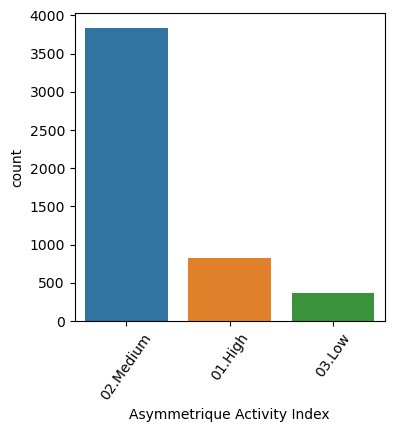

In [23]:
# visualising Asymmetrique Activity Index we are doing Univariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(x =leadData['Asymmetrique Activity Index'], data = leadData)
plt.xticks(rotation = 55)
plt.show()

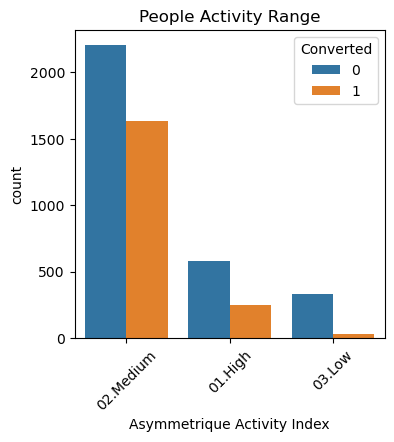

In [24]:
# visualising Asymmetrique Activity Index with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(data=leadData,x=leadData['Asymmetrique Activity Index'],hue="Converted")
plt.title('People Activity Range')
plt.xticks(rotation = 45)
plt.show()

##### INSIGHTS: </br>
As we know <b><u> Converted column </u></b> is our Target Column on the basis of which we are analysing, Leads Activity Index shows
that Leads having <b><u> Medium range are more likely to become converted than High or Low Range Index.</u></b>

#### 5. Asymmetrique Profile Index

In [25]:
# List of unique values and their counts
leadData['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

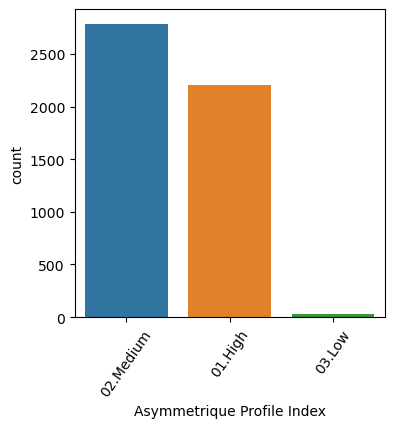

In [26]:
# visualising Asymmetrique Profile Index we are doing Univariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(x =leadData['Asymmetrique Profile Index'], data = leadData)
plt.xticks(rotation = 55)
plt.show()

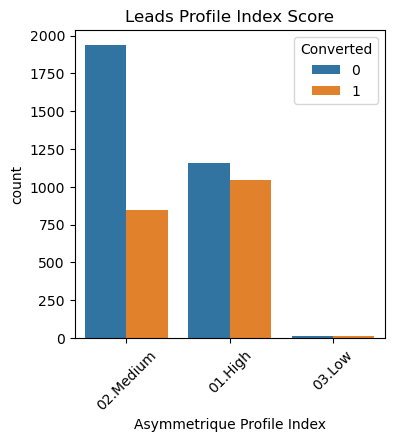

In [27]:
# visualising Asymmetrique Profile Index with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(data=leadData,x=leadData['Asymmetrique Profile Index'],hue="Converted")
plt.title('Leads Profile Index Score')
plt.xticks(rotation = 45)
plt.show()

##### INSIGHTS: </br>
As we know <b><u> Converted column </u></b> is our Target Column on the basis of which we are analysing, Leads Profile Index shows
that Leads having <b><u> High and Medium range are more likely to become converted than Low Range Index.</u></b>

##### 6.  Asymmetrique Activity Score, Asymmetrique Profile Score

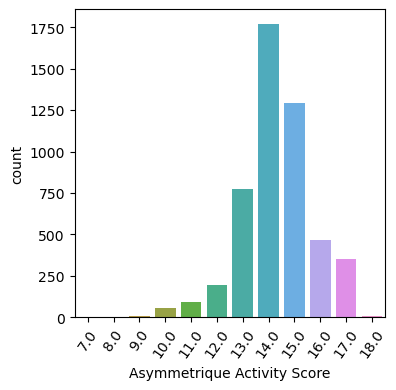

In [28]:
# visualising Asymmetrique Profile Index we are doing Univariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(x =leadData['Asymmetrique Activity Score'], data = leadData)
plt.xticks(rotation = 55)
plt.show()

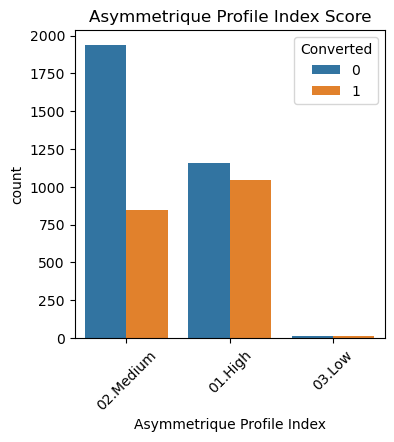

In [29]:
# visualising Asymmetrique Profile Index with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(data=leadData,x=leadData['Asymmetrique Profile Index'],hue="Converted")
plt.title('Asymmetrique Profile Index Score')
plt.xticks(rotation = 45)
plt.show()

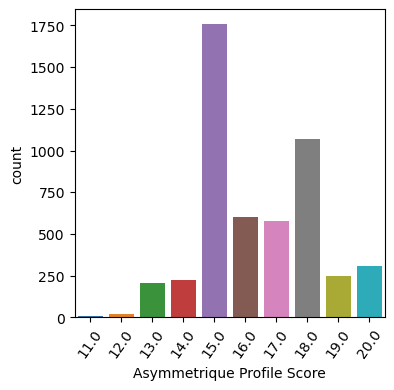

In [30]:
# visualising Asymmetrique Profile Index we are doing Univariate Analysis.
plt.figure(figsize=(4,4))
sns.countplot(x =leadData['Asymmetrique Profile Score'], data = leadData)
plt.xticks(rotation = 55)
plt.show()

##### INSIGHTS: </br>
We get a good <b><u>Asymmetrique Lead Activity Score</u></b> range in between 10 to 17.But max Activity Score is at 14.0</br>
And we get a good <b><u> Asymmetrique Lead Profile Score </u></b> range in between 11 to 20 .But max Profile score is at 15.0

#### After analysing all the columns we are now dropping it as they have 40% and more null values.

In [31]:
## Dropping those columns which have null values > 40%
leadData.drop(col_to_drop,inplace=True,axis=1)

#### Using fillna() filling values whose missing values in less than 40%

In [32]:
# between 0 to 40%
col_to_fill

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [33]:
# creating 2 list seperately for using fillna(mean) and fillna(mode[0]) method
categorical_list_fillna=['Lead Source','Last Activity','Country','Specialization','What is your current occupation',
                               'What matters most to you in choosing a course', 'Tags', 'City']
numerical_list_fillna=['TotalVisits', 'Page Views Per Visit']

In [34]:
#using fillna method we are filling all missing values with mean values for numerical list
for i in numerical_list_fillna:
    leadData[i]=leadData[i].fillna(leadData[i].mean)

In [35]:
#using fillna method we are filling all missing values with mode()[0] for categorical list
for i in categorical_list_fillna:
     leadData[i]=leadData[i].fillna(leadData[i].mode()[0])

In [36]:
# again checking for missing values
leadData.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [37]:
# Checking shape of data
leadData.shape

(9240, 30)

In [38]:
#checking info of datatype
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Number                                    9240 non-null   int64 
 2   Lead Origin                                    9240 non-null   object
 3   Lead Source                                    9240 non-null   object
 4   Do Not Email                                   9240 non-null   object
 5   Do Not Call                                    9240 non-null   object
 6   Converted                                      9240 non-null   int64 
 7   TotalVisits                                    9240 non-null   object
 8   Total Time Spent on Website                    9240 non-null   int64 
 9   Page Views Per Visit                           9240 non-null   

## Performing  EDA

### 1. UNIVARIATE ANALYSIS And BIVARIATE ANALYSIS

#### Converting float to numeric

In [39]:
# coerces non-numeric junk to NaNs
leadData['TotalVisits'] = pd.to_numeric(leadData['TotalVisits'], errors='coerce') 
leadData['Page Views Per Visit'] = pd.to_numeric(leadData['Page Views Per Visit'], errors='coerce') 

# one final `convert_dtypes` call to convert to nullable int
pd.to_numeric(leadData['TotalVisits'], errors='coerce').convert_dtypes() 
pd.to_numeric(leadData['Page Views Per Visit'], errors='coerce').convert_dtypes() 

0        0.0
1        2.5
2        2.0
3        1.0
4        1.0
        ... 
9235    2.67
9236     2.0
9237     2.0
9238     3.0
9239     3.0
Name: Page Views Per Visit, Length: 9240, dtype: Float64

In [40]:
leadData.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

#### INSIGHTS:
 <b><u> Lead Number </u></b> is a numeric column ,it is just a number assigned to each lead,no need to do Univariate or Bivariate Analysis.

#### Converted Column Analysis

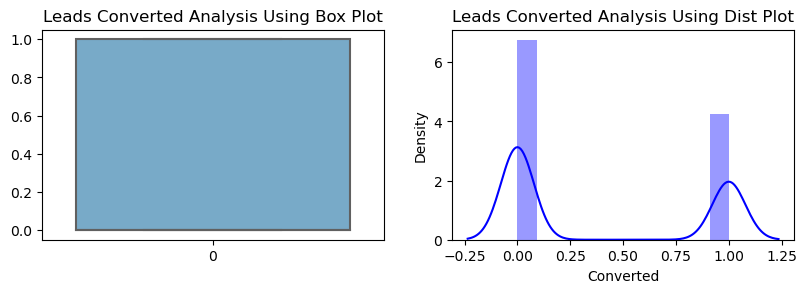

In [41]:
#### Converted 
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Leads Converted Analysis Using Box Plot')
sns.boxplot(leadData['Converted'] , palette = 'Blues')

plt.subplot(2,3,2)
plt.title('Leads Converted Analysis Using Dist Plot')
sns.distplot(leadData['Converted'] , color = 'b')

plt.show()

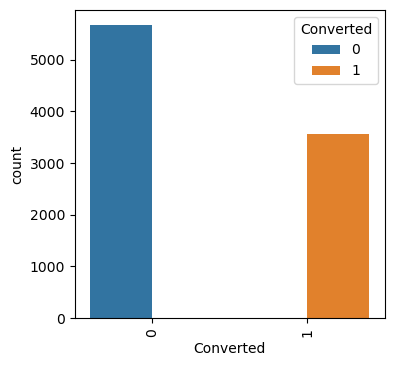

In [42]:
# visualising Converted with respect to Converted we are doing Bivariate Analysis.
fig, axs = plt.subplots(figsize = (4,4))
sns.countplot(x = "Converted", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS: 
Number of Leads <b><u> Converted </u></b> is 45% whereas <b><u>Not Converted</u></b> is 55%  little difference in between.

#### TotalVisits

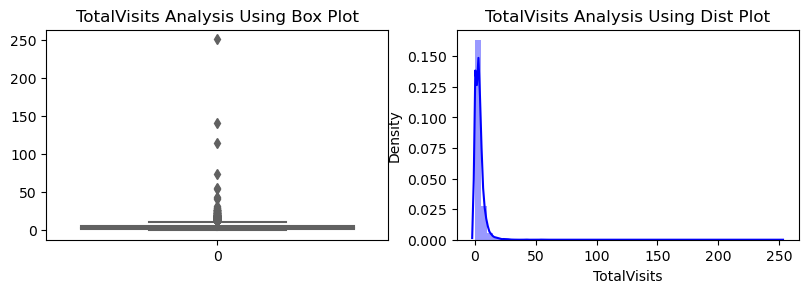

In [43]:
#### TotalVisits
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('TotalVisits Analysis Using Box Plot')
sns.boxplot(leadData['TotalVisits'] , palette = 'Reds')

plt.subplot(2,3,2)
plt.title('TotalVisits Analysis Using Dist Plot')
sns.distplot(leadData['TotalVisits'] , color = 'b')
plt.show()

In [44]:
leadData['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [45]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = leadData['TotalVisits'].quantile([0.05,0.95]).values
leadData['TotalVisits'][leadData['TotalVisits'] <= percentiles[0]] = percentiles[0]
leadData['TotalVisits'][leadData['TotalVisits'] >= percentiles[1]] = percentiles[1]

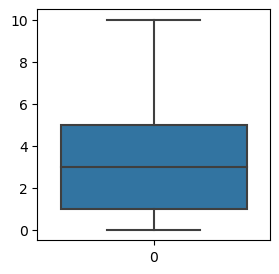

In [46]:
plt.figure(figsize=(3,3))
sns.boxplot(leadData['TotalVisits'])
plt.show()

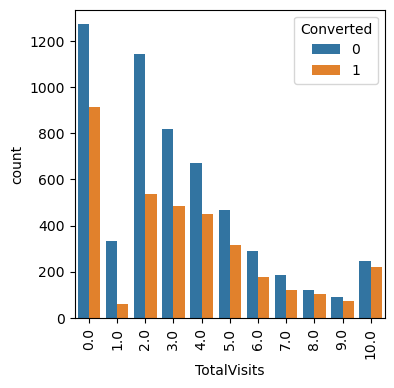

In [47]:
# visualising TotalVisits with respect to Converted we are doing Bivariate Analysis.
fig, axs = plt.subplots(figsize = (4,4))
sns.countplot(x = "TotalVisits", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

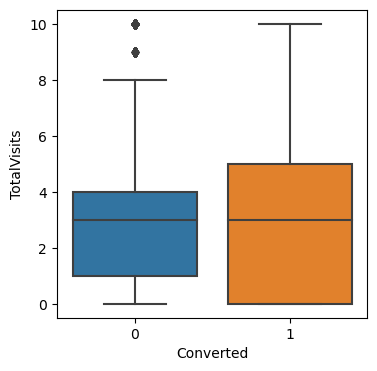

In [48]:
fig, axs = plt.subplots(figsize = (4,4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadData)
plt.show()

#### INSIGHTS: 
Number of Lead's <b><u> TotalVisits </u></b> is same that is lies in median in both the cases if a lead is converted or not.

#### Page Views Per Visit

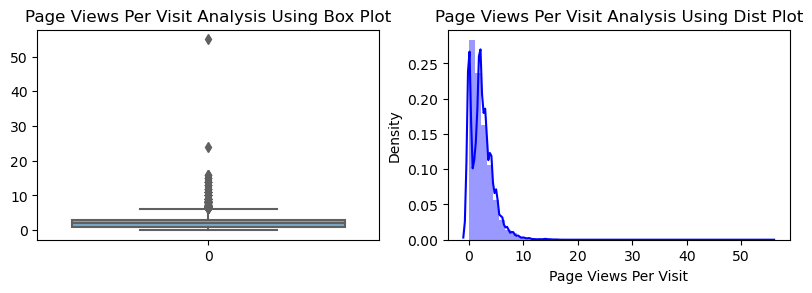

In [49]:
#### Page Views Per Visit
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Page Views Per Visit Analysis Using Box Plot')
sns.boxplot(leadData['Page Views Per Visit'] , palette = 'Blues')

plt.subplot(2,3,2)
plt.title('Page Views Per Visit Analysis Using Dist Plot')
sns.distplot(leadData['Page Views Per Visit'] , color = 'b')
plt.show()

In [50]:
leadData['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [51]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = leadData['Page Views Per Visit'].quantile([0.05,0.95]).values
leadData['Page Views Per Visit'][leadData['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leadData['Page Views Per Visit'][leadData['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

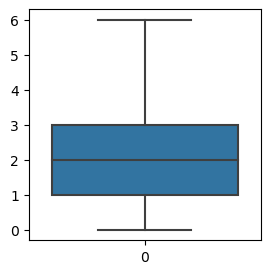

In [52]:
plt.figure(figsize=(3,3))
sns.boxplot(leadData['Page Views Per Visit'])
plt.show()

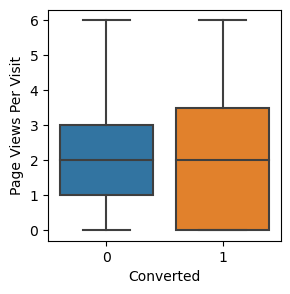

In [53]:
# Page Views Per Visit with respect to Converted we are doing Bivariate Analysis
plt.figure(figsize=(3,3))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leadData)
plt.show()

#### INSIGHTS: 
<b><u> Page Views Per Visit </u></b> is same for both the cases as median lies same in both the cases if a lead is converted or not.

#### Total Time Spent on Website

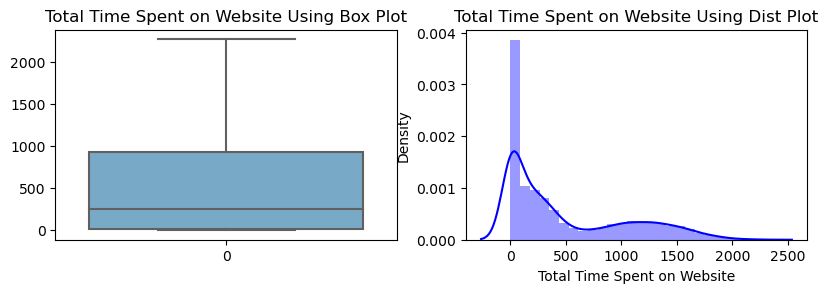

In [54]:
plt.figure(figsize=(15,6))
plt.subplot(2,3,1)
plt.title('Total Time Spent on Website Using Box Plot')
sns.boxplot(leadData['Total Time Spent on Website'] , palette = 'Blues')

plt.subplot(2,3,2)
plt.title('Total Time Spent on Website Using Dist Plot')
sns.distplot(leadData['Total Time Spent on Website'] , color = 'b')
plt.show()

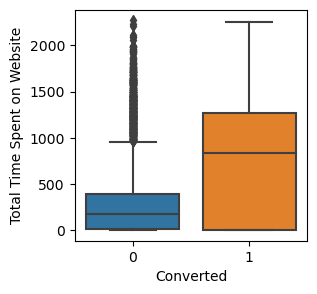

In [55]:
# Total Time Spent on Website with respect to Converted we are doing Bivariate Analysis
plt.figure(figsize=(3,3))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leadData)
plt.show()

#### INSIGHTS: 
Leads spending more time on the<b><u> Website </b></u> are more likely to be converted.

#### Lead Origin

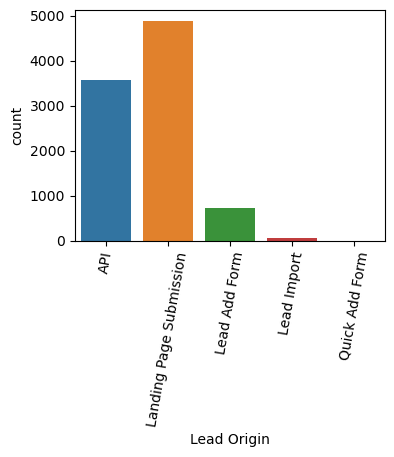

In [56]:
# visualising Lead Origin we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Lead Origin'], data = leadData)
plt.xticks(rotation = 80)
plt.show()

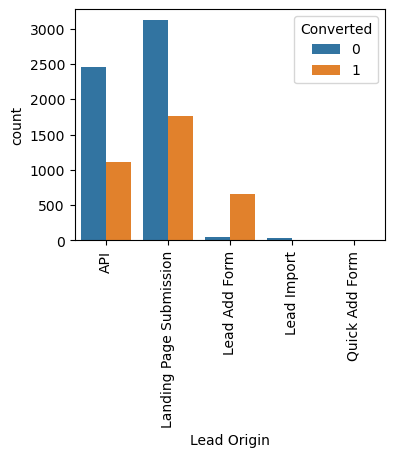

In [57]:
# visualising Lead Origin with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
API and Landing Page Submission have 40-50% conversion rate but count of lead originated from them are considerable.</br>
Lead Add Form has more than 90% conversion rate but count of lead are not very high.</br>
Lead Import are very less in count.

#### Lead Source

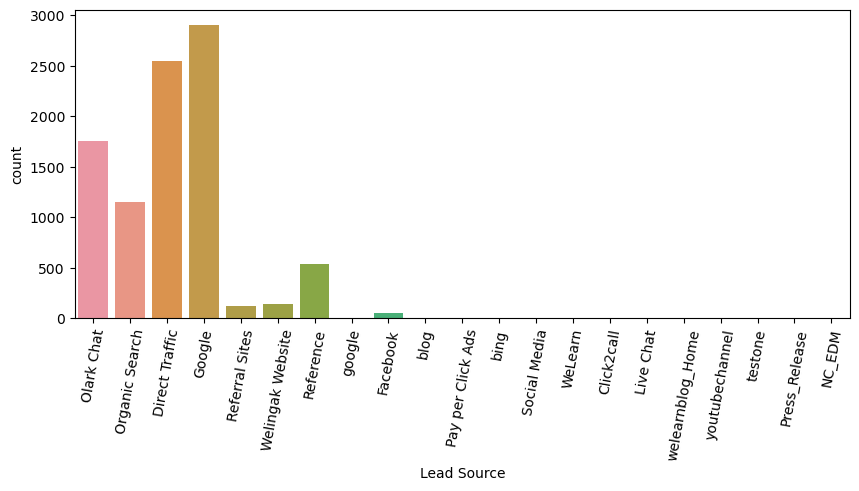

In [58]:
# visualising Lead Source we are doing Univariate Analysis.
plt.figure(figsize=(10,4))
sns.countplot(x =leadData['Lead Source'], data = leadData)
plt.xticks(rotation = 80)
plt.show()

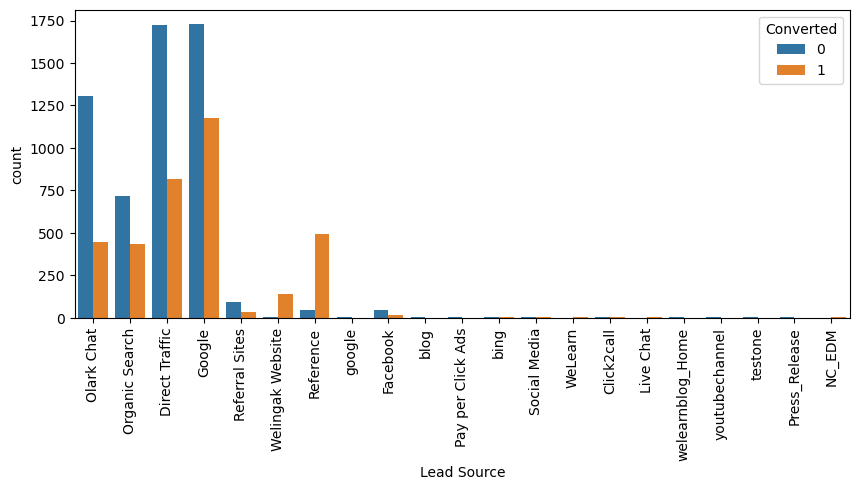

In [59]:
# visualising Lead Source with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(10,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Lead Source from <b><u> Google </b></u> has a very high chance of getting converted.Whereas Lead from <b><u> Direct Traffic, Organic Search, Olark Chat, Reference </b></u> also likely to be converted as compared to others.

#### Do Not Email

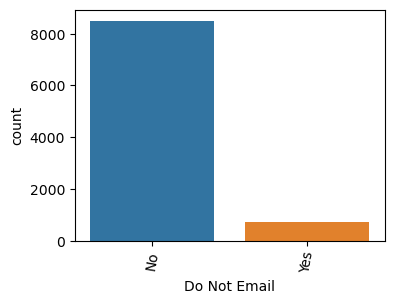

In [60]:
# visualising Do Not Email we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Do Not Email'], data = leadData)
plt.xticks(rotation = 80)
plt.show()

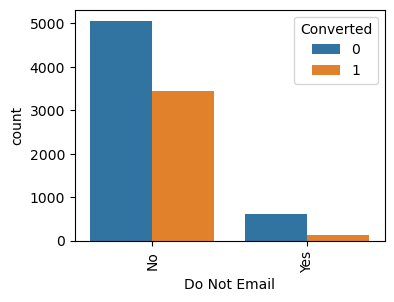

In [61]:
# visualising Do Not Email with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
<b><u>Do Not Email </b></u> is opted by majority of Leads.But 50% of them is converted.

#### Do Not Call

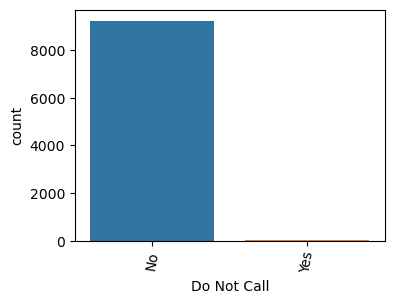

In [62]:
# visualising Do Not Call we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Do Not Call'], data = leadData)
plt.xticks(rotation = 80)
plt.show()

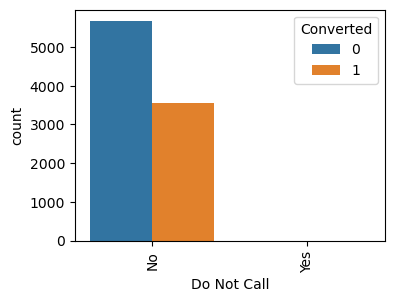

In [63]:
# visualising Do Not Call with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Do Not Call", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Clearly <b><u>Do Not Call </b></u> is opted by majority of Leads.They don't want to be converted.

#### Last Activity

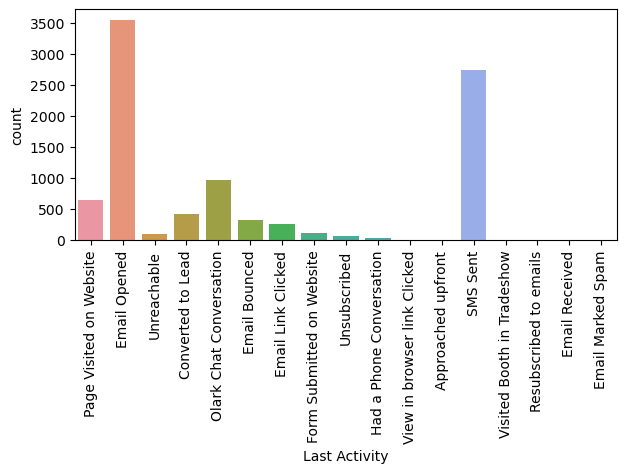

In [64]:
# visualising Last Activity we are doing Univariate Analysis.
plt.figure(figsize=(7,3))
sns.countplot(x =leadData['Last Activity'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

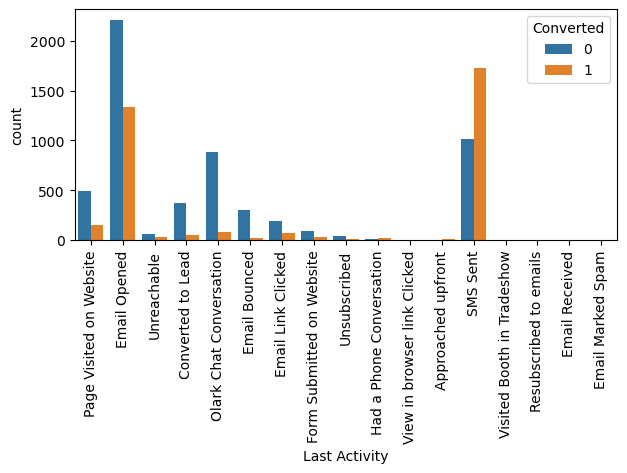

In [65]:
# visualising Last Activity with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(7,3))
sns.countplot(x = "Last Activity", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most of the lead have their <b><u>Email opened</b></u> as their last activity.
Conversion rate for leads with last activity as <b><u>SMS Sent</b></u> is almost 65%.

#### Country

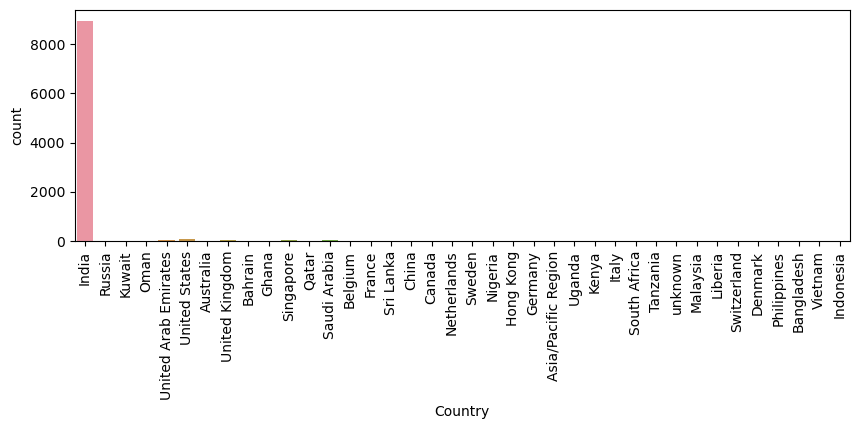

In [66]:
# visualising Country we are doing Univariate Analysis.
plt.figure(figsize=(10,3))
sns.countplot(x =leadData['Country'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

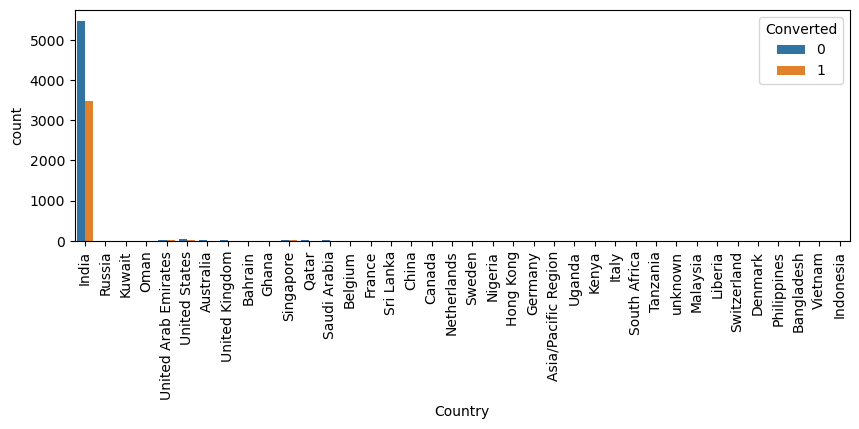

In [67]:
# visualising Country with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(10,3))
sns.countplot(x = "Country", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most of the Leads from <u><b> India </b></u> only who get converted too.But by having one value we cannot make any inference as such. 

#### Specialization

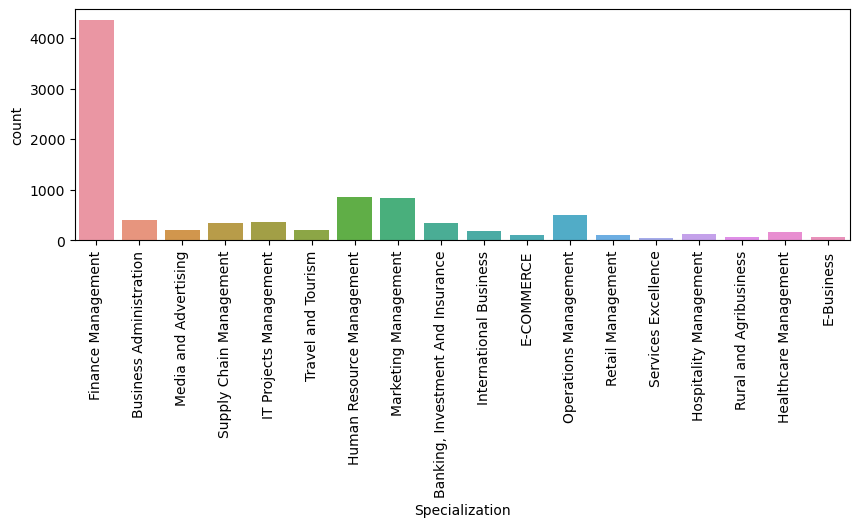

In [68]:
# visualising Specialization we are doing Univariate Analysis.
plt.figure(figsize=(10,3))
sns.countplot(x =leadData['Specialization'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

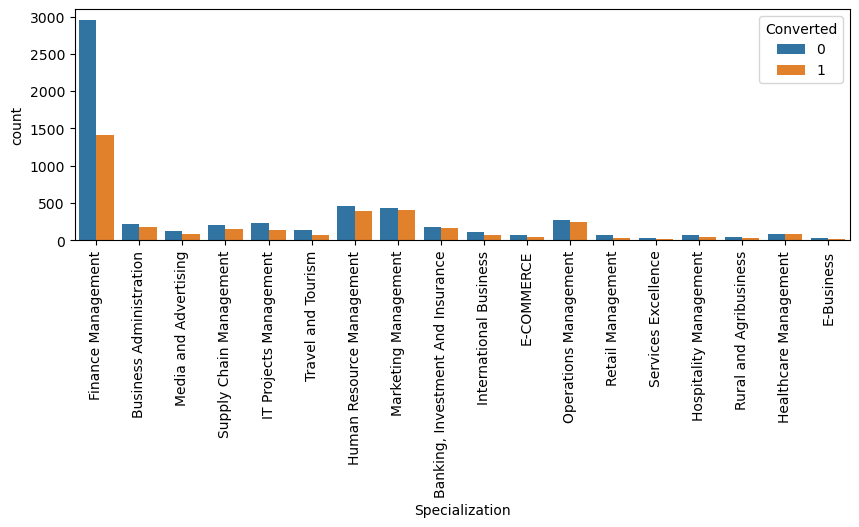

In [69]:
# visualising Specialization with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(10,3))
sns.countplot(x = "Specialization", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Leads maximum having Specilization in <b><u> Finance Management </b></u> are most likely to be converted than others.

#### What is your current occupation

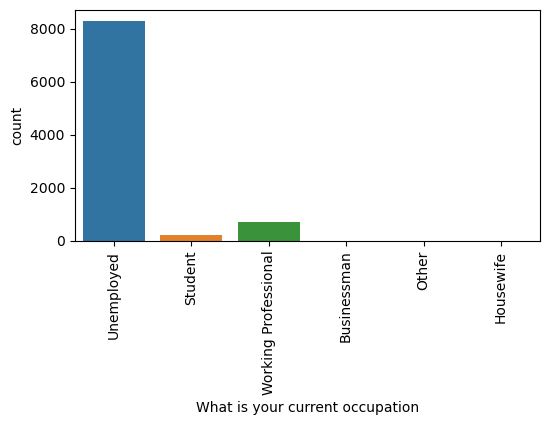

In [70]:
# visualising What is your current occupation we are doing Univariate Analysis.
plt.figure(figsize=(6,3))
sns.countplot(x =leadData['What is your current occupation'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

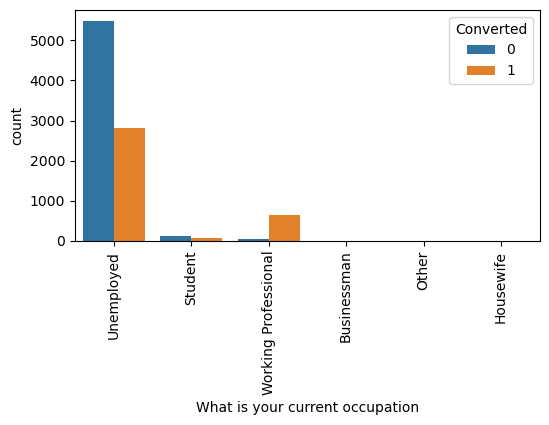

In [71]:
# visualising What is your current occupation with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(6,3))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Working Professionals going for the course have high chances of joining it.</br>
Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### What matters most to you in choosing a course

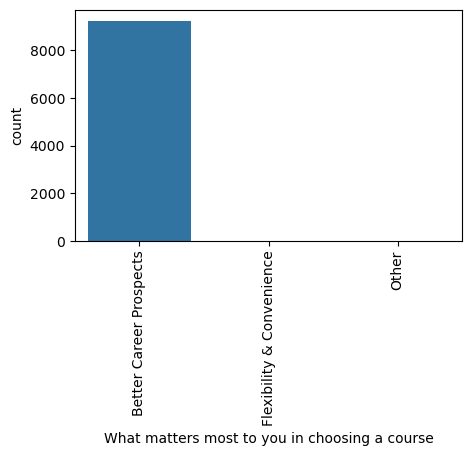

In [72]:
# visualising What matters most to you in choosing a course we are doing Univariate Analysis.
plt.figure(figsize=(5,3))
sns.countplot(x =leadData['What matters most to you in choosing a course'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

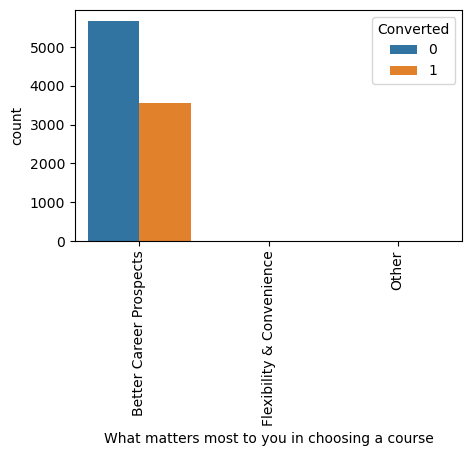

In [73]:
# visualising What matters most to you in choosing a course with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(5,3))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most Leads are choosing course for <b><u> Better Career Prospects </b></u>. No Inference can be drawn with this single parameter.

#### Search

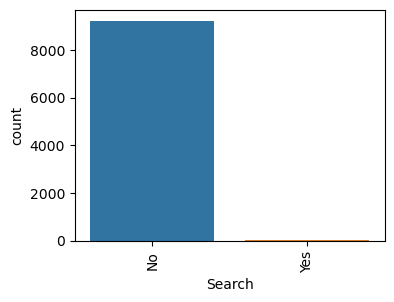

In [74]:
# visualising Search we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Search'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

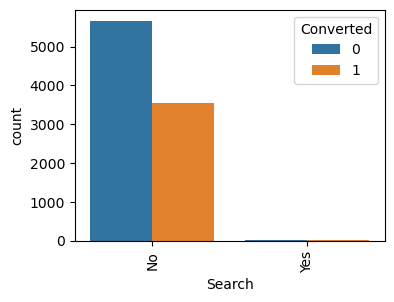

In [75]:
# visualising Search with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Search", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most entries are <b><u>No from Search </b></u>. No Inference can be drawn with this single valued parameter.

#### Magazine

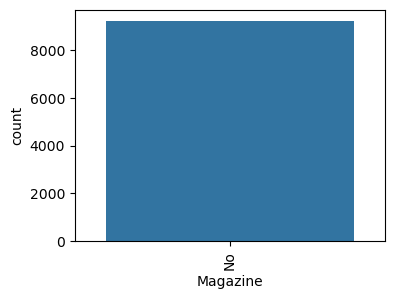

In [76]:
# visualising Magazine we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Magazine'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

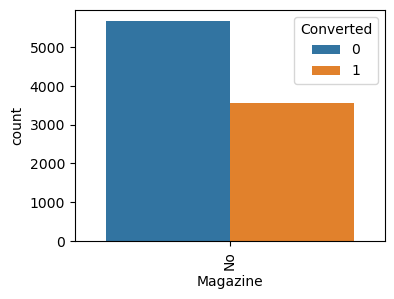

In [77]:
# visualising Magazine with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Magazine", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most entries are <b><u>No from Magazine </b></u>. No Inference can be drawn with this single valued parameter.

#### Newspaper Article

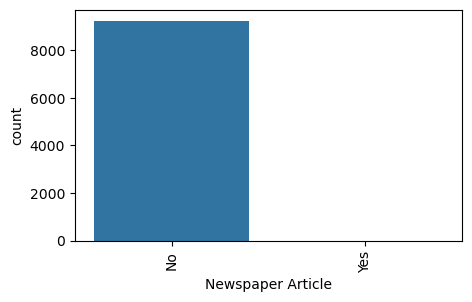

In [78]:
# visualising Newspaper Article we are doing Univariate Analysis.
plt.figure(figsize=(5,3))
sns.countplot(x =leadData['Newspaper Article'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

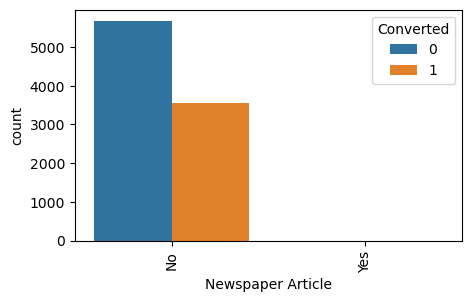

In [79]:
# visualising Newspaper Article with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(5,3))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most entries are <b><u>No from Newspapper Article </b></u>. No Inference can be drawn with this single valued parameter.

#### X Education Forums

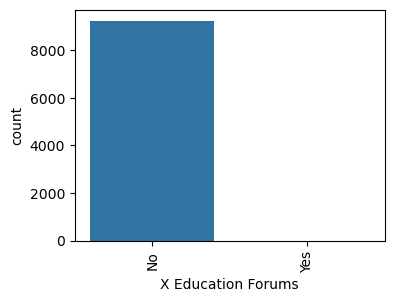

In [80]:
# visualising X Education Forums we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['X Education Forums'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

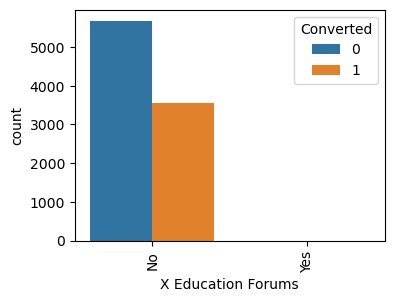

In [81]:
# visualising X Education Forums with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "X Education Forums", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most entries are <b><u>No from X Education Forums </b></u>. No Inference can be drawn with this single valued parameter.

#### Newspaper

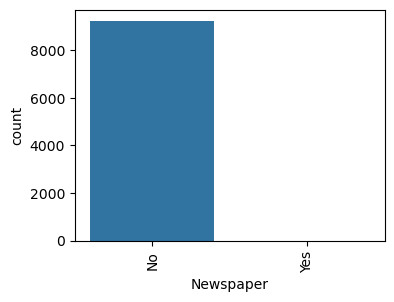

In [82]:
# visualising Newspaper we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Newspaper'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

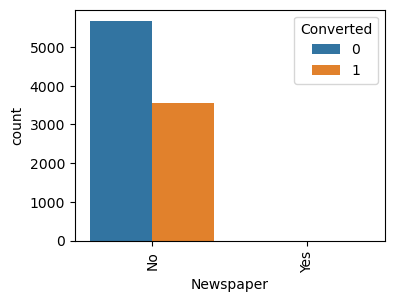

In [83]:
# visualising Newspaper with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Newspaper", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most entries are <b><u>No from Newspaper </b></u>. No Inference can be drawn with this single valued parameter.

#### Digital Advertisement

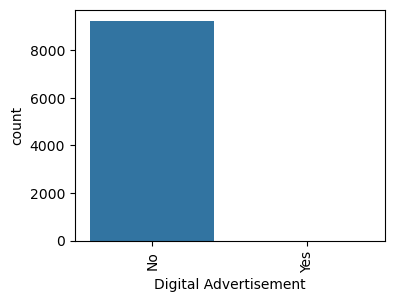

In [84]:
# visualising Digital Advertisement we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Digital Advertisement'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

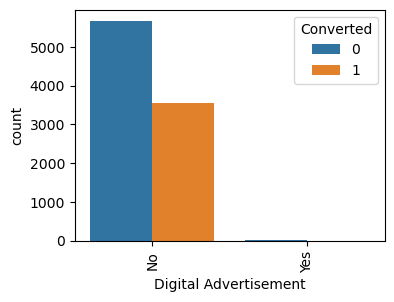

In [85]:
# visualising Digital Advertisement with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most entries are <b><u>No from Digital Advertisement </b></u>. No Inference can be drawn with this single valued parameter.

#### Through Recommendations

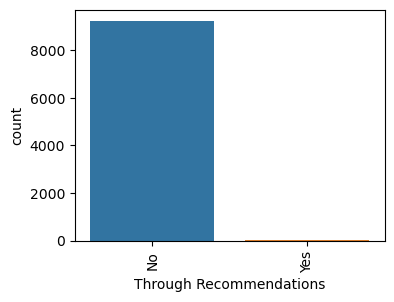

In [86]:
# visualising Through Recommendations we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Through Recommendations'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

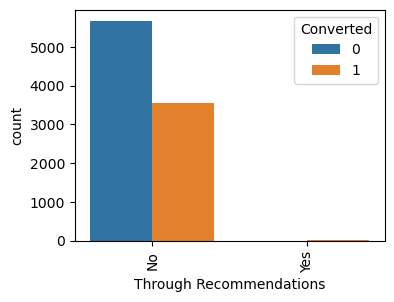

In [87]:
# visualising Through Recommendations with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most entries are <b><u>No Through Recommendations </b></u>. No Inference can be drawn with this single valued parameter.

#### Receive More Updates About Our Courses

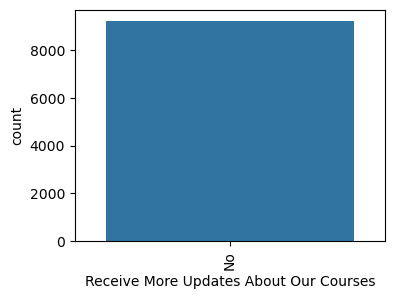

In [88]:
# visualising Receive More Updates About Our Courses we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Receive More Updates About Our Courses'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

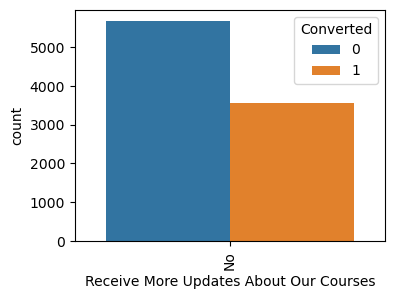

In [89]:
# visualising Receive More Updates About Our Courses with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most entries are <b><u>No for Receive More Updates About Our Courses </b></u>. No Inference can be drawn with this single valued parameter.

#### Tags

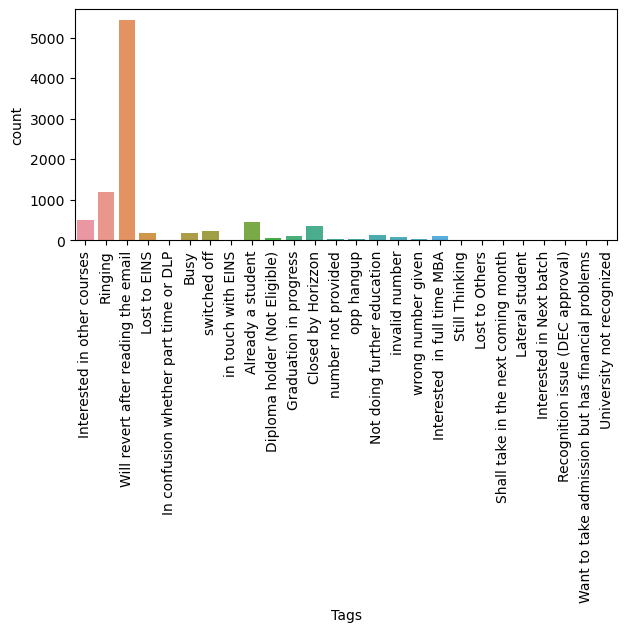

In [90]:
# visualising Tags we are doing Univariate Analysis.
plt.figure(figsize=(7,3))
sns.countplot(x =leadData['Tags'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

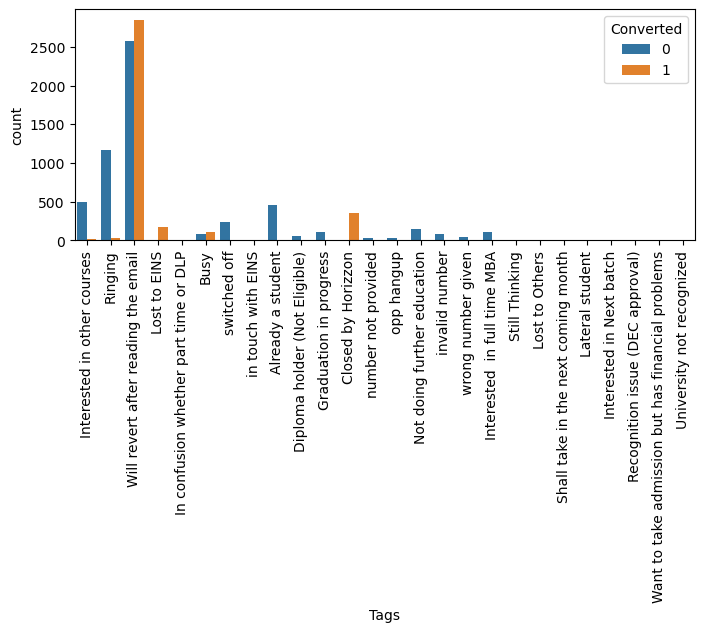

In [91]:
# visualising Tags with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(8,3))
sns.countplot(x = "Tags", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:

Most of the Leads fallow <b><u>Tags as 'Will revert after reading the email' </b></u>. And there chances of conversion is also high as compared to others.

#### Update me on Supply Chain Content

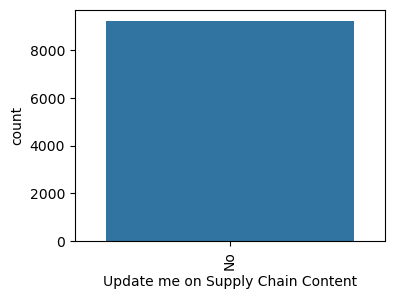

In [92]:
# visualising Update me on Supply Chain Content we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Update me on Supply Chain Content'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

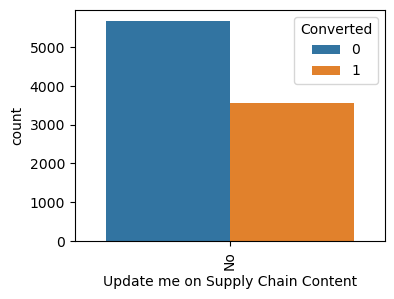

In [93]:
# visualising Update me on Supply Chain Content with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most entries are <b><u> No for Update me on Supply Chain Content </b></u>. No Inference can be drawn with this parameter

#### Get updates on DM Content

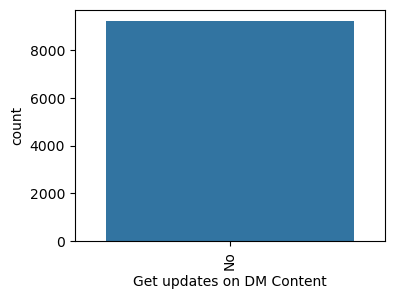

In [94]:
# visualising Get updates on DM Content we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['Get updates on DM Content'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

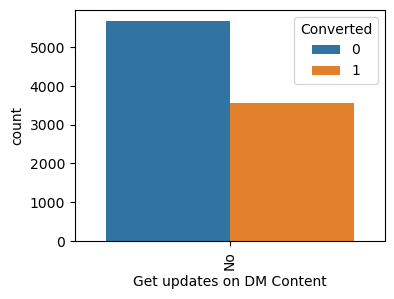

In [95]:
# visualising Get updates on DM Content with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most entries are <b><u> No for Get updates on DM Content </b></u> . No Inference can be drawn with this parameter

#### City

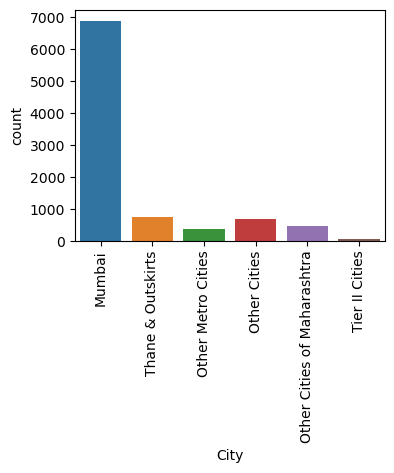

In [96]:
# visualising City we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['City'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

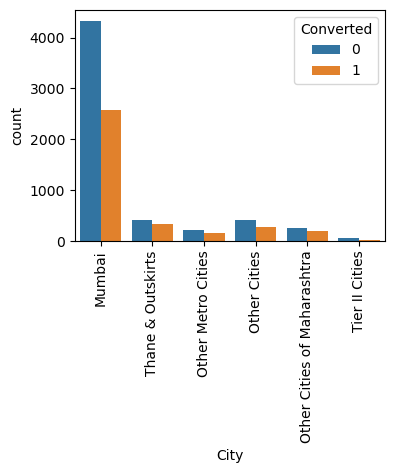

In [97]:
# visualising City with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "City", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
From <b><u> Mumbai City </b></u> we can get a majority of Leads.Overall through Maharashtra we can have a good chance of getting Leads and there conversion too as compared with other cities.

#### I agree to pay the amount through cheque

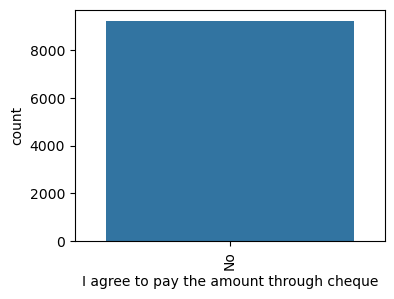

In [98]:
# visualising I agree to pay the amount through cheque we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['I agree to pay the amount through cheque'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

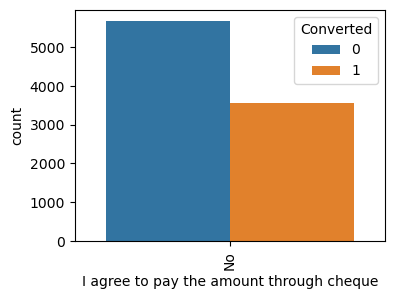

In [99]:
# visualising I agree to pay the amount through cheque with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most entries are <b><u> No for 'I agree to pay the amount through cheque' </b></u>. No Inference can be drawn with this parameter.

#### A free copy of Mastering The Interview

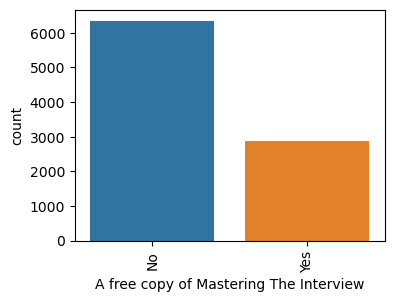

In [100]:
# visualising A free copy of Mastering The Interview we are doing Univariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x =leadData['A free copy of Mastering The Interview'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

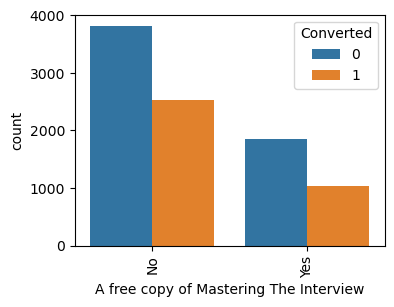

In [101]:
# visualising A free copy of Mastering The Interview with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(4,3))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Most entries are <b><u> No for "A free copy of Mastering The Interview" </b></u> Than Yes. No Inference can be drawn with this parameter.

#### Last Notable Activity

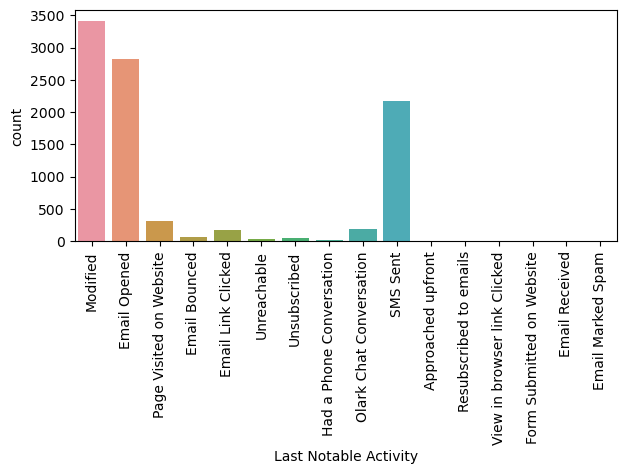

In [102]:
# visualising Last Notable Activity we are doing Univariate Analysis.
plt.figure(figsize=(7,3))
sns.countplot(x =leadData['Last Notable Activity'], data = leadData)
plt.xticks(rotation = 90)
plt.show()

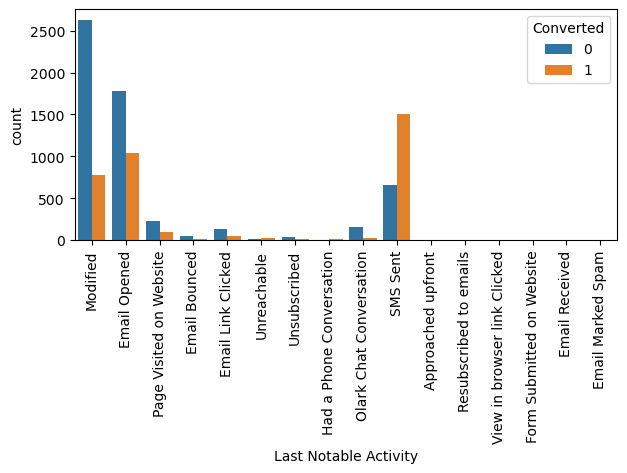

In [103]:
# visualising Last Notable Activity with respect to Converted we are doing Bivariate Analysis.
plt.figure(figsize=(7,3))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leadData)
plt.xticks(rotation = 90)
plt.show()

#### INSIGHTS:
Maximun Leads <b><u> Last Notable Activity </b></u> is Email Openend , SMS Sent,or Modified and they also get converted than others.

### MULTIVARIATE ANALYSIS

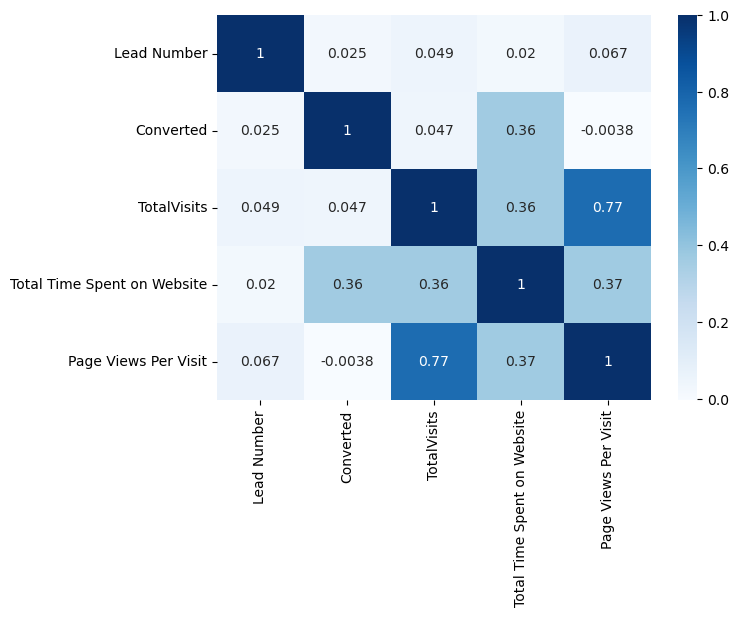

In [104]:
#Creating HEATMAP and checking corelation between each variable.
plt.figure(figsize=(7,5))
sns.heatmap(leadData.corr(),cmap="Blues",annot=True)
plt.show()

<Figure size 2000x800 with 0 Axes>

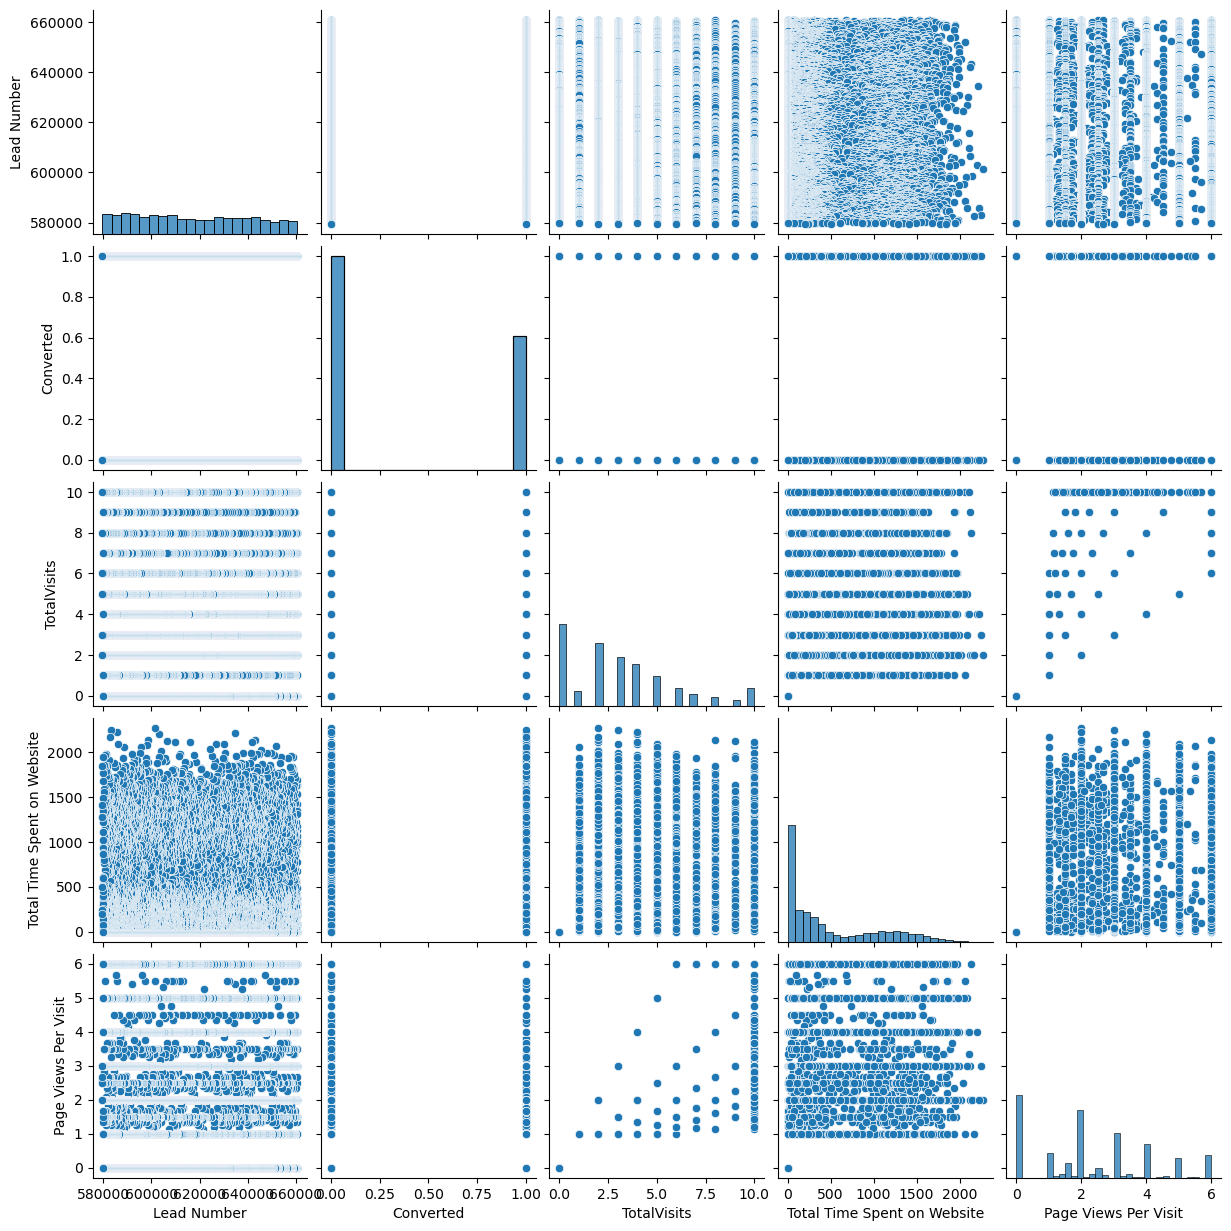

In [105]:
# Analysing Numeric Variables and there Corelation using pair plot
plt.figure(figsize=(20,8))
sns.pairplot(leadData)
plt.show()

#### INSIGHTS:
From above it is clearly understandable that all parameters are independent of each other and they don't have any correlation.Hence we have to consider all parameters we cannot drop anyone.Where as TotalVisits and Page Views Per Visit have a fair correlation of 0.77 ,But on this we cannot delete anyone of them ,as they don't have strong correlation.

#### Based on the univariate and Bivariate analysis we have seen that many columns are not adding any information to the model, heance we can drop them for further analysis

In [106]:
leadData = leadData.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [107]:
# analysing shape
leadData.shape

(9240, 15)

In [108]:
# analysing dtype of data
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9240 non-null   object 
 3   Do Not Email                     9240 non-null   object 
 4   Do Not Call                      9240 non-null   object 
 5   Converted                        9240 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9240 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9240 non-null   object 
 10  Specialization                   9240 non-null   object 
 11  What is your current occupation  9240 non-null   object 
 12  Tags                

In [109]:
# viewing data
leadData.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0       Finance Management                      Unemployed   
1       Finance Management                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4       Finance Management                      Unemployed   

                                  Tags    City Last Notable Activity  
0          Interested in other courses  Mumbai              Modified  
1                              Ringing  Mumbai          Email Opened  
2  Will revert after reading the email  Mumbai          Email Opened  
3                              Ringing  Mumbai              Modified  
4  Will revert after reading the email  Mumbai              Modified

# Step 3 - Data Preparation

#### Substituting values 'YES' with 1 and 'NO' with 0

In [110]:
# lists of all columns having 'Yes','No' values
substitute_list = ['Do Not Email','Do Not Call']

In [111]:
# substitute 'YES' with 1 and 'NO' with 0
def change_to_binary(x):
    x = x.map({'Yes':1,'No':0})
    return x
leadData[substitute_list] = leadData[substitute_list].apply(change_to_binary)                                  

In [112]:
leadData.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0       Finance Management                      Unemployed   
1       Finance Management                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4       Finance Management                      Unemployed   

                                  Tags    City Last Notable Activity  
0          Interested in other courses  Mumbai              Modified  
1                              Ringing  Mumbai          Email Opened  
2  Will revert after reading the email  Mumbai          Email Opened  
3                              Ringing  Mumbai              Modified  
4  Will revert after reading the email  Mumbai              Modified

#### Creating dummy variables for the remaining categorical variables and dropping the level with big names.

In [113]:
# creating dummy table
#Dropping first column using principle for n levels we require (n-1) dummy variables.
dummy_table = pd.get_dummies(leadData[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']],drop_first = True)
dummy_table.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  ...  \
0                      0                   0                       1  ...   
1                      0                   0                       0  ...   
2                      0                   0                       0  ...   
3                      0                   0                       0  ...   
4                      0                   0                       0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1         

In [114]:
# concat with leadData
leadData = pd.concat([leadData,dummy_table],axis =1)

In [115]:
#now dropping origin variable from leadData
leadData = leadData.drop(['Prospect ID','Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City','Last Notable Activity'], axis = 1)

In [116]:
# viewing data
leadData.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  

In [117]:
# analysing shape
leadData.shape

(9240, 113)

In [118]:
#describe the data along all quantiles.
leadData.describe()

Do Not Email  Do Not Call    Converted  TotalVisits  \
count   9240.000000  9240.000000  9240.000000  9103.000000   
mean       0.079437     0.000216     0.385390     3.181918   
std        0.270435     0.014711     0.486714     2.781834   
min        0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     1.000000   
50%        0.000000     0.000000     0.000000     3.000000   
75%        0.000000     0.000000     1.000000     5.000000   
max        1.000000     1.000000     1.000000    10.000000   

       Total Time Spent on Website  Page Views Per Visit  \
count                  9240.000000           9103.000000   
mean                    487.698268              2.258944   
std                     548.021466              1.792536   
min                       0.000000              0.000000   
25%                      12.000000              1.000000   
50%                     248.000000              2.000000   
75%                     936.000000              3.000000   
max                    2272.000000              6.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9240.000000                9240.000000   
mean                              0.528788                   0.077706   
std                               0.499198                   0.267722   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  ...  \
count              9240.000000                 9240.000000  ...   
mean                  0.005952                    0.000108  ...   
std                   0.076926                    0.010403  ...   
min                   0.000000                    0.000000  ...   
25%                   0.000000                    0.000000  ...   
50%                   0.000000                    0.000000  ...   
75%                   0.000000                    0.000000  ...   
max                   1.000000                    1.000000  ...   

       Last Notable Activity_Form Submitted on Website  \
count                                      9240.000000   
mean                                          0.000108   
std                                           0.010403   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                           1.000000   

       Last Notable Activity_Had a Phone Conversation  \
count                                     9240.000000   
mean                                         0.001515   
std                                          0.038898   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Last Notable Activity_Modified  \
count                     9240.000000   
mean                         0.368723   
std                          0.482485   
min                          0.000000   
25%                          0.000000   
50%                          0.000000   
75%                          1.000000   
max                          1.000000   

       Last Notable Activity_Olark Chat Conversation  \
count                                    9240.000000   
mean                                        0.019805   
std                                         0.139338   
min           

In [119]:
leadData.isna().sum()

Do Not Email                                            0
Do Not Call                                             0
Converted                                               0
TotalVisits                                           137
Total Time Spent on Website                             0
                                                     ... 
Last Notable Activity_Resubscribed to emails            0
Last Notable Activity_SMS Sent                          0
Last Notable Activity_Unreachable                       0
Last Notable Activity_Unsubscribed                      0
Last Notable Activity_View in browser link Clicked      0
Length: 113, dtype: int64

In [120]:
leadData=leadData.dropna()

# Step -4 Splitting the Data and Create Training and Testing sets

In [121]:
# Putting feature variable to X
X = leadData.drop(['Converted'], axis=1)

In [122]:
# Putting feature variable to y
y=leadData['Converted']

In [123]:
# splitting data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [124]:
#printing Train Test shape
print(X_train.shape)
print(X_test.shape)

(6372, 112)
(2731, 112)


# Step-5 Scaling All Features

In [125]:
# we apply scaling before processing further
# creating object for StandardScaler 
scaler = StandardScaler()

In [126]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
7962             0            0          3.0                         1286   
5520             0            0          7.0                           60   
1962             0            0          5.0                          169   
1566             0            0         10.0                         1241   
9170             0            0          0.0                            0   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
7962                   1.5                                    1   
5520                   6.0                                    1   
1962                   2.5                                    1   
1566                   3.5                                    1   
9170                   0.0                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
7962                          0                        0   
5520                          0                        0   
1962                          0                        0   
1566                          0                        0   
9170                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Direct Traffic  ...  \
7962                           0                           0  ...   
5520                           0                           1  ...   
1962                           0                           0  ...   
1566                           0                           0  ...   
9170                           0                           0  ...   

      Last Notable Activity_Form Submitted on Website  \
7962                                                0   
5520                                                0   
1962                                                0   
1566                                                0   
9170                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7962                                               0   
5520                                               0   
1962                                               0   
1566                                               0   
9170                                               0   

      Last Notable Activity_Modified  \
7962                               0   
5520                               0   
1962                               1   
1566                               0   
9170                               0   

      Last Notable Activity_Olark Chat Conversation  \
7962                                              0   
5520                                              0   
1962                                              0   
1566                                              0   
9170                                              0   

      Last Notable Activity_Page Visited on Website  \
7962                                              0   
5520                                              0   
1962                                              0   
1566                                              0   
9170                                              0   

      Last Notable Activity_Resubscribed to emails  \
7962                                             0   
5520                                             0   
1962                                             0   
1566                                             0   
9170                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7962                               1                                  0   
5520                               0                                  0   
1962                               0                                  0   
1566                               0                                  0   
9170                               0                                  0   

     

In [127]:
# we have to apply scaling on numerical values except dummy vals,0's and 1's i,e Yes/No type
# create a list
scale_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# applying fit_transform() of StandardScaler for Scaling the train set
X_train[scale_list] = scaler.fit_transform(X_train[scale_list])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
7962             0            0    -0.068258                     1.476324   
5520             0            0     1.362470                    -0.771066   
1962             0            0     0.647106                    -0.571257   
1566             0            0     2.435517                     1.393834   
9170             0            0    -1.141305                    -0.881052   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
7962             -0.423364                                    1   
5520              2.083179                                    1   
1962              0.133646                                    1   
1566              0.690655                                    1   
9170             -1.258878                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
7962                          0                        0   
5520                          0                        0   
1962                          0                        0   
1566                          0                        0   
9170                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Direct Traffic  ...  \
7962                           0                           0  ...   
5520                           0                           1  ...   
1962                           0                           0  ...   
1566                           0                           0  ...   
9170                           0                           0  ...   

      Last Notable Activity_Form Submitted on Website  \
7962                                                0   
5520                                                0   
1962                                                0   
1566                                                0   
9170                                                0   

      Last Notable Activity_Had a Phone Conversation  \
7962                                               0   
5520                                               0   
1962                                               0   
1566                                               0   
9170                                               0   

      Last Notable Activity_Modified  \
7962                               0   
5520                               0   
1962                               1   
1566                               0   
9170                               0   

      Last Notable Activity_Olark Chat Conversation  \
7962                                              0   
5520                                              0   
1962                                              0   
1566                                              0   
9170                                              0   

      Last Notable Activity_Page Visited on Website  \
7962                                              0   
5520                                              0   
1962                                              0   
1566                                              0   
9170                                              0   

      Last Notable Activity_Resubscribed to emails  \
7962                                             0   
5520                                             0   
1962                                             0   
1566                                             0   
9170                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
7962                               1                                  0   
5520                               0                                  0   
1962                               0                                  0   
1566                               0                                  0   
9170                               0                                  0   

     

In [128]:
# Checking the Converted Rate
Converted = (sum(leadData['Converted'])/len(leadData['Converted'].index))*100
Converted

38.02043282434362

#### We have almost 39% conversion

# Step 6: Looking at Correlations

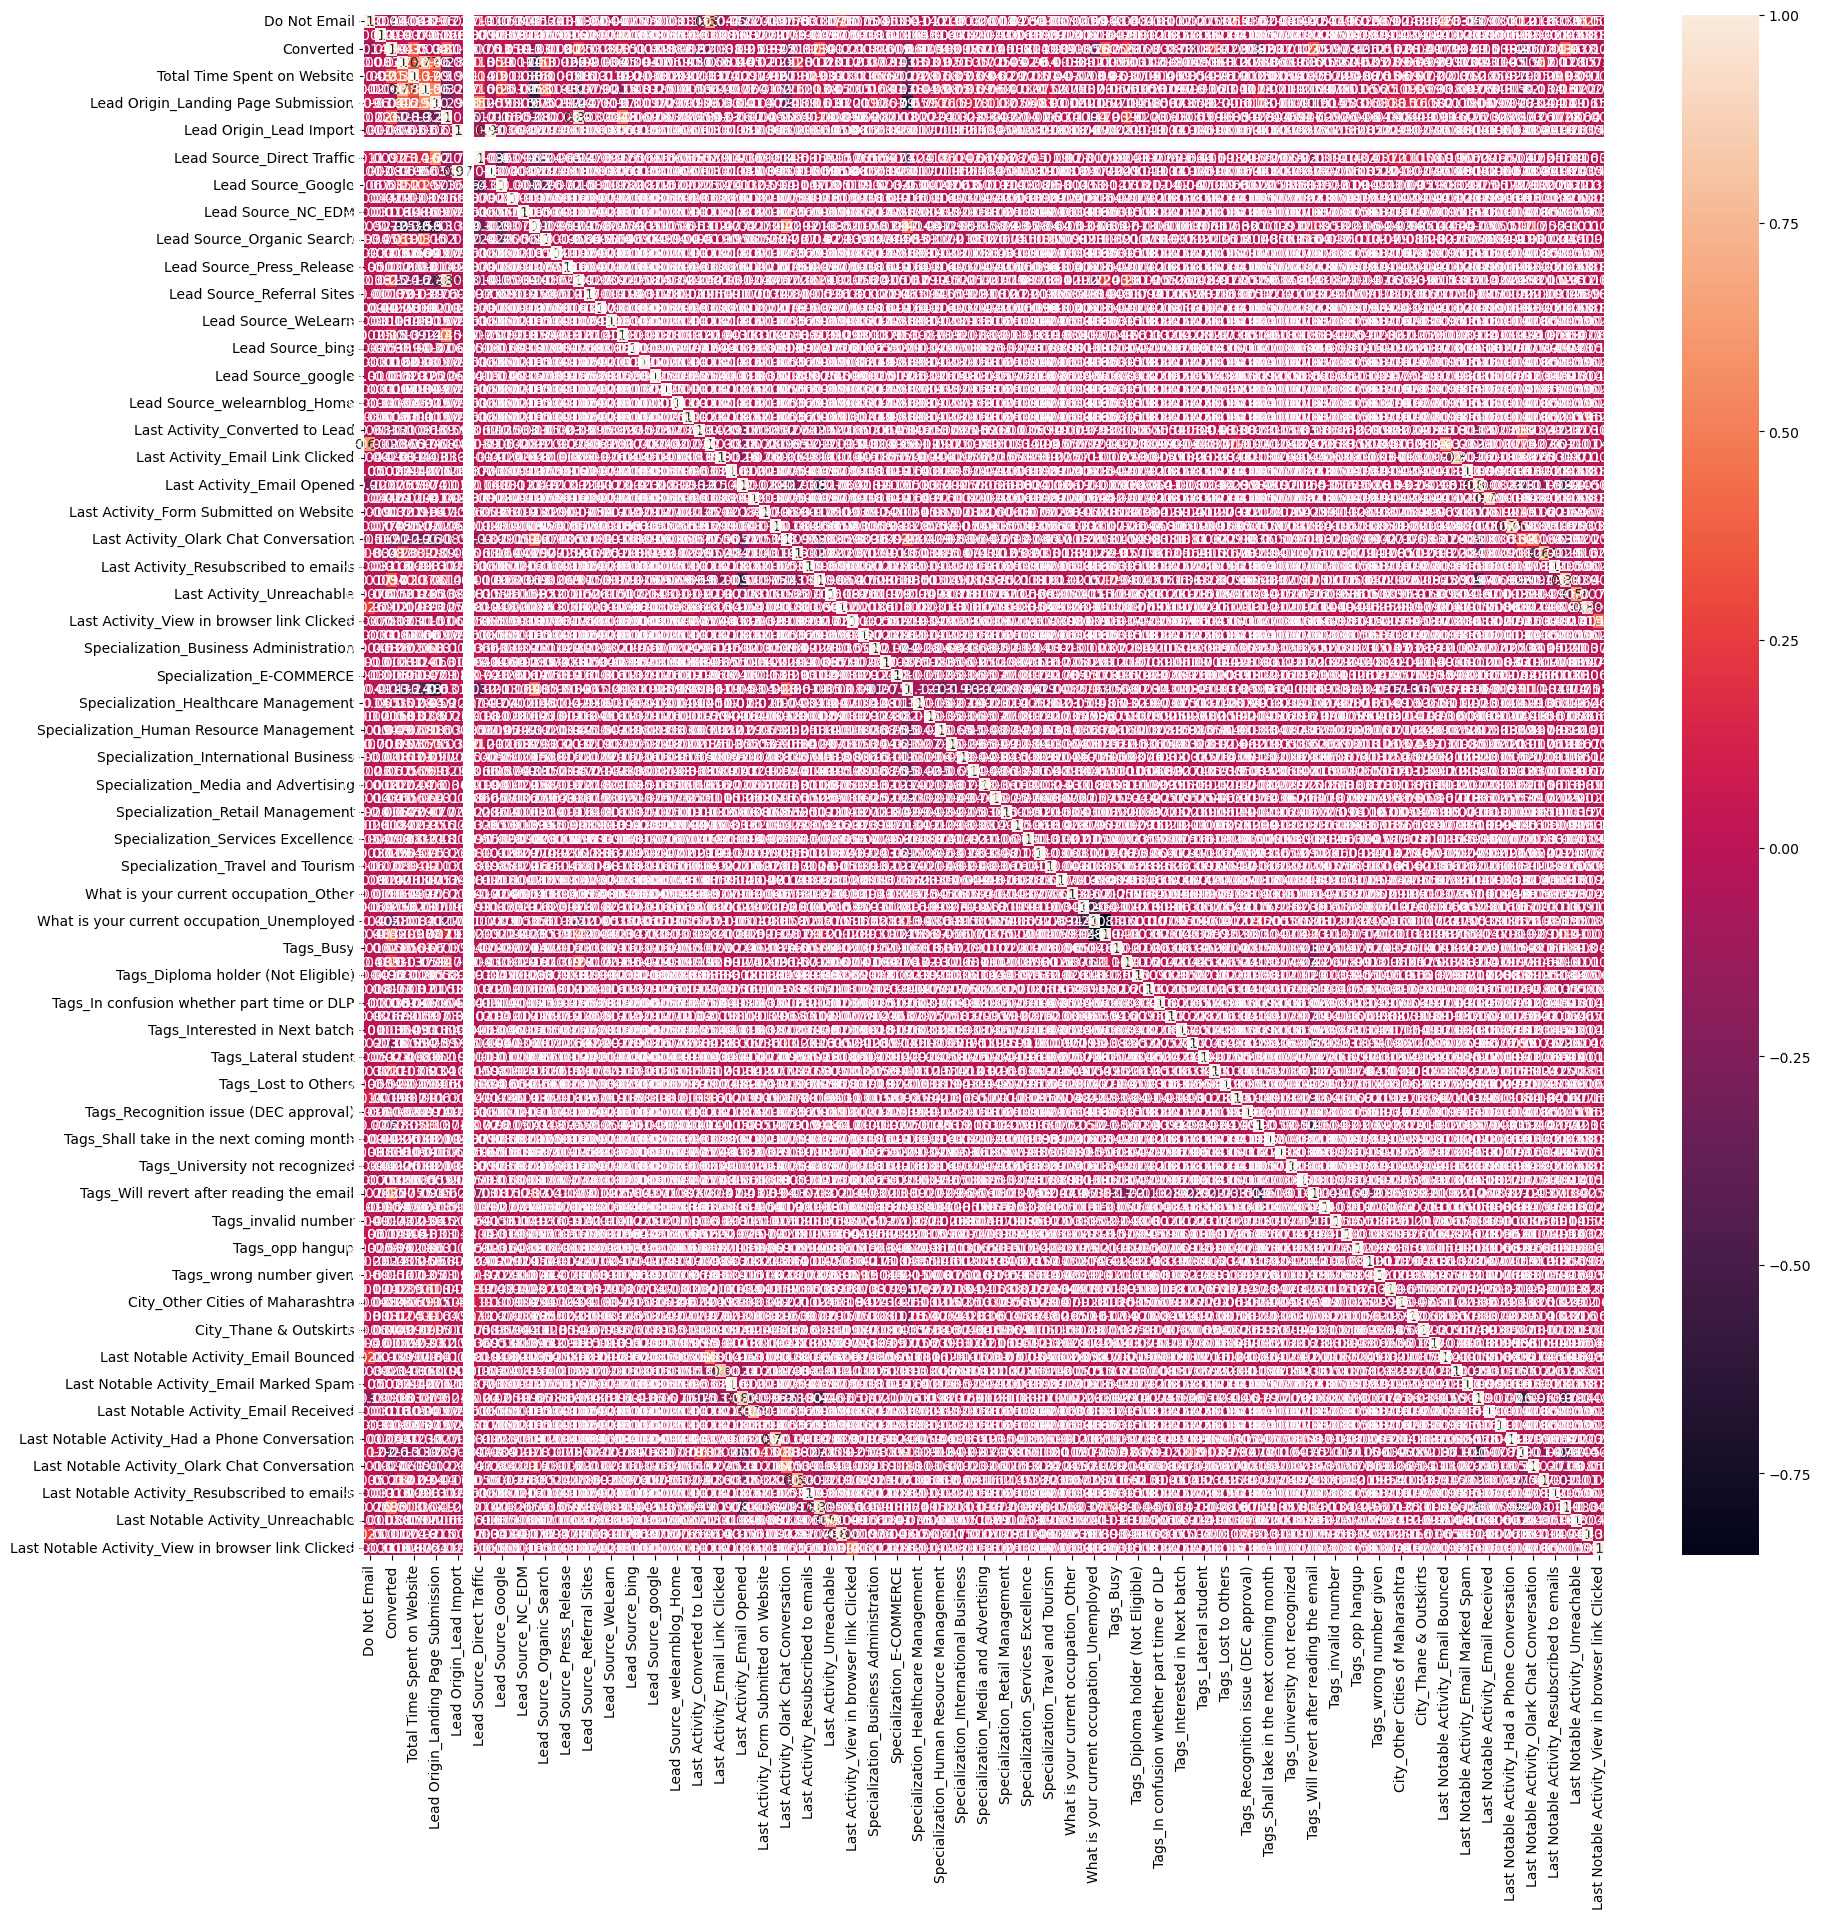

In [129]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(leadData.corr(),annot = True)
plt.show()

#### Data is very big to be seen

# Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

In [130]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                          107
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1612.5
Date:                Fri, 15 Sep 2023   Deviance:                       3224.9
Time:                        14:42:11   Pearson chi2:                 1.14e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5603
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     42.4352   2.29e+05      0.000      1.000   -4.48e+05    4.48e+05
Do Not Email                                              -1.4006      0.279     -5.015      0.000      -1.948      -0.853
Do Not Call                                               23.0094   1.41e+05      0.000      1.000   -2.76e+05    2.76e+05
TotalVisits                                                0.2709      0.075      3.628      0.000       0.125       0.417
Total Time Spent on Website                                1.1361      0.055     20.770      0.000       1.029       1.243
Page Views Per Visit                                      -0.2562      0.082     -3.119      0.002      -0.417      -0.095
Lead Origin_Landing Page Submission                       -0.5043      0.152     -3.312      0.001      -0.803      -0.206
Lead Origin_Lead Add Form                                  3.2247      1.083      2.978      0.003       1.103       5.347
Lead Origin_Lead Import                                   25.3505   3.13e+04      0.001      0.999   -6.13e+04    6.14e+04
Lead Origin_Quick Add Form                              -1.36e-09    6.2e-05   -2.2e-05      1.000      -0.000       0.000
Lead Source_Direct Traffic                               -22.1526   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Source_Facebook                                     -45.5605   8.09e+04     -0.001      1.000   -1.59e+05    1.59e+05
Lead Source_Google                                       -21.9812   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Source_Live Chat                                     -0.2573    1.7e+05  -1.51e-06      1.000   -3.33e+05    3.33e+05
Lead Source_NC_EDM                                         2.7337   2.29e+05    1.2e-05      1.000   -4.48e+05    4.48e+05
Lead Source_Olark Chat                                   -21.3490   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Source_Organic Search                               -21.9220   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Source_Pay per Click Ads                            -41.5216   2.29e+05     -0.000      1.000   -4.48e+05    4.48e+05
Lead Source_Press_Release                              -7.509e-09   8.86e-05  -8.47e-05      1.000      -0.000       0.000
Lead Source_Reference                                    -22.0308   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Source_Referral Sites                               -22.4197   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Source_Social Media                                 -18.6188   7.46e+04     -0.000      1.000   -1.46e+05    1.46e+05
Lead Sou

# Step 8: Feature Selection Using RFE

In [131]:
# creating a object for LogisticRegression Model
logreg = LogisticRegression()

In [132]:
# running rfe with 20 top variable
rfe = RFE(logreg, step =15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [133]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False])

In [134]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 3),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 5),
 ('Lead Source_Press_Release', False, 5),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead

In [135]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_blog', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Prof

In [136]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Healthcare Management',
   

#### Assessing the model with StatsModels

In [137]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1633.9
Date:                Fri, 15 Sep 2023   Deviance:                       3267.9
Time:                        14:42:12   Pearson chi2:                 1.10e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5573
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.1195      0.470     -4.505      0.000      -3.042      -1.197
Do Not Email                                              -1.3788      0.272     -5.064      0.000      -1.912      -0.845
Total Time Spent on Website                                1.1489      0.054     21.281      0.000       1.043       1.255
Lead Origin_Landing Page Submission                       -0.5882      0.138     -4.250      0.000      -0.860      -0.317
Lead Origin_Lead Add Form                                  3.5008      1.062      3.296      0.001       1.419       5.583
Lead Origin_Lead Import                                    1.7206      0.616      2.793      0.005       0.513       2.928
Lead Source_Olark Chat                                     0.6376      0.152      4.196      0.000       0.340       0.935
Lead Source_Reference                                     -0.2678      1.106     -0.242      0.809      -2.435       1.900
Lead Source_Referral Sites                                -0.3049      0.403     -0.757      0.449      -1.094       0.485
Lead Source_Social Media                                   3.2496      2.755      1.180      0.238      -2.149       8.648
Lead Source_Welingak Website                               1.2684      1.284      0.988      0.323      -1.248       3.785
Lead Source_blog                                         -24.5405   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                       -23.7137   6.85e+04     -0.000      1.000   -1.34e+05    1.34e+05
Last Activity_Converted to Lead                           -0.4756      0.303     -1.572      0.116      -1.069       0.117
Last Activity_Email Bounced                               -0.9747      0.628     -1.553      0.120      -2.205       0.255
Last Activity_Had a Phone Conversation                     1.1828      1.315      0.899      0.369      -1.395       3.761
Last Activity_Olark Chat Conversation                     -0.7537      0.253     -2.984      0.003      -1.249      -0.259
Last Activity_SMS Sent                                     0.7389      0.213      3.473      0.001       0.322       1.156
Last Activity_Unreachable                                  1.0469      0.736      1.422      0.155      -0.396       2.490
Last Activity_Unsubscribed                                 1.5141      1.306      1.160      0.246      -1.045       4.073
Specialization_E-Business                                  0.5665      0.674      0.841      0.400      -0.754       1.887
Specialization_Finance Management                         -0.6578      0.122     -5.408      0.000      -0.896      -0.419
Speciali

In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    1.733794e-10
5520    7.942114e-02
1962    1.063999e-03
1566    9.834897e-01
9170    9.983019e-03
5097    2.924763e-01
8954    3.512354e-02
309     2.895662e-01
5519    7.714306e-01
1050    6.989255e-01
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.73379361e-10, 7.94211405e-02, 1.06399879e-03, 9.83489718e-01,
       9.98301898e-03, 2.92476318e-01, 3.51235386e-02, 2.89566153e-01,
       7.71430560e-01, 6.98925490e-01])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [140]:
# creating a dataframe
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0    1.733794e-10         7962
1          0    7.942114e-02         5520
2          0    1.063999e-03         1962
3          1    9.834897e-01         1566
4          0    9.983019e-03         9170

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [141]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0    1.733794e-10         7962          0
1          0    7.942114e-02         5520          0
2          0    1.063999e-03         1962          0
3          1    9.834897e-01         1566          1
4          0    9.983019e-03         9170          0

In [142]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3688  265]
 [ 370 2049]]


In [143]:
# Predicted     not_converted    converted
# Actual
# not_converted       3748      254
# converted           373       2093  

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.900345260514752


#### Checking VIFs

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                           Lead Origin_Lead Add Form  18.72
25         What is your current occupation_Unemployed  18.59
6                               Lead Source_Reference  14.28
40           Tags_Will revert after reading the email   9.68
53                     Last Notable Activity_SMS Sent   7.84
16                             Last Activity_SMS Sent   7.68
9                        Lead Source_Welingak Website   5.14
2                 Lead Origin_Landing Page Submission   4.53
18                         Last Activity_Unsubscribed   4.34
55                 Last Notable Activity_Unsubscribed   4.30
50                     Last Notable Activity_Modified   4.25
20                  Specialization_Finance Management   3.10
38                                       Tags_Ringing   3.00
26  What is your current occupation_Working Profes...   2.52
15              Last Activity_Olark Chat Conversation   2.43
5                              Lead Source_Olark Chat   2.40
13                        Last Activity_Email Bounced   2.32
0                                        Do Not Email   2.15
14             Last Activity_Had a Phone Conversation   2.03
49     Last Notable Activity_Had a Phone Conversation   2.03
33                   Tags_Interested in other courses   1.89
28                            Tags_Closed by Horizzon   1.73
17                          Last Activity_Unreachable   1.66
54                  Last Notable Activity_Unreachable   1.59
51      Last Notable Activity_Olark Chat Conversation   1.49
12                    Last Activity_Converted to Lead   1.42
44                                  Tags_switched off   1.41
1                         Total Time Spent on Website   1.40
47                Last Notable Activity_Email Bounced   1.36
27                                          Tags_Busy   1.33
35                                  Tags_Lost to EINS   1.33
37                   Tags_Not doing further education   1.27
30                        Tags_Graduation in progress   1.17
42                                Tags_invalid number   1.16
52      Last Notable Activity_Page Visited on Website   1.15
29                 Tags_Diploma holder (Not Eligible)   1.11
45                            Tags_wrong number given   1.09
48           Last Notable Activity_Email Link Clicked   1.07
43                           Tags_number not provided   1.07
7                          Lead Source_Referral Sites   1.06
22              Specialization_International Business   1.04
4                             Lead Origin_Lead Import   1.04
21              Specialization_Hospitality Management   1.03
24          What is your current occupation_Housewife   1.03
46                                City_Tier II Cities   1.03
23                 Specialization_Services Excellence   1.02
41                            Tags_in touch with EINS   1.02
19                          Specialization_E-Business   1.02
36                                Tags_Lost to Others   1.02
32                      Tags_Interested in Next batch   1.02
39  Tags_Want to take admission but has financial ...   1.02
34                               Tags_Lateral student   1.01
31         Tags_In confusion whether part time or DLP   1.01
11                                 Lead Source_google   1.01
8                            Lead Source_Social Media   1.00
10                                   Lead Source_blog   1.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable <b><u>'What is your current occupation_Unemployed'</u></b> has the highest VIF. So let's start by dropping that.

In [146]:
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_blog', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizz

In [147]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1642.4
Date:                Fri, 15 Sep 2023   Deviance:                       3284.8
Time:                        14:42:14   Pearson chi2:                 1.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5561
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.3284      0.385     -8.650      0.000      -4.083      -2.574
Do Not Email                                              -1.3432      0.271     -4.947      0.000      -1.875      -0.811
Total Time Spent on Website                                1.1521      0.054     21.366      0.000       1.046       1.258
Lead Origin_Landing Page Submission                       -0.5771      0.138     -4.182      0.000      -0.847      -0.307
Lead Origin_Lead Add Form                                  3.4955      1.062      3.291      0.001       1.414       5.577
Lead Origin_Lead Import                                    1.7035      0.615      2.770      0.006       0.498       2.909
Lead Source_Olark Chat                                     0.6372      0.152      4.203      0.000       0.340       0.934
Lead Source_Reference                                     -0.2250      1.105     -0.204      0.839      -2.391       1.941
Lead Source_Referral Sites                                -0.3222      0.402     -0.801      0.423      -1.111       0.466
Lead Source_Social Media                                   3.1935      2.725      1.172      0.241      -2.148       8.535
Lead Source_Welingak Website                               1.2614      1.284      0.983      0.326      -1.255       3.778
Lead Source_blog                                         -24.5760   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                       -23.7239   6.86e+04     -0.000      1.000   -1.34e+05    1.34e+05
Last Activity_Converted to Lead                           -0.4937      0.302     -1.635      0.102      -1.085       0.098
Last Activity_Email Bounced                               -0.9937      0.630     -1.578      0.115      -2.228       0.240
Last Activity_Had a Phone Conversation                     1.1474      1.309      0.877      0.381      -1.417       3.712
Last Activity_Olark Chat Conversation                     -0.7528      0.251     -2.995      0.003      -1.245      -0.260
Last Activity_SMS Sent                                     0.7119      0.212      3.352      0.001       0.296       1.128
Last Activity_Unreachable                                  1.0077      0.737      1.368      0.171      -0.436       2.451
Last Activity_Unsubscribed                                 1.4508      1.304      1.112      0.266      -1.106       4.007
Specialization_E-Business                                  0.6007      0.655      0.917      0.359      -0.683       1.884
Specialization_Finance Management                         -0.6624      0.121     -5.460      0.000      -0.900      -0.425
Speciali

In [148]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [149]:
y_train_pred[:10]

array([1.73390493e-10, 8.22653641e-02, 1.06270034e-03, 9.83417028e-01,
       1.25099719e-02, 2.95672928e-01, 3.50195005e-02, 2.96413895e-01,
       7.72357410e-01, 7.06827092e-01])

In [150]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [151]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0    1.733905e-10         7962          0
1          0    8.226536e-02         5520          0
2          0    1.062700e-03         1962          0
3          1    9.834170e-01         1566          1
4          0    1.250997e-02         9170          0

In [152]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8990897677338355


So overall the accuracy hasn't dropped much.

#### Let's check the VIFs again

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                           Lead Origin_Lead Add Form  18.70
6                               Lead Source_Reference  14.28
52                     Last Notable Activity_SMS Sent   7.81
16                             Last Activity_SMS Sent   7.68
9                        Lead Source_Welingak Website   5.14
39           Tags_Will revert after reading the email   4.97
18                         Last Activity_Unsubscribed   4.34
54                 Last Notable Activity_Unsubscribed   4.29
49                     Last Notable Activity_Modified   4.14
2                 Lead Origin_Landing Page Submission   3.65
20                  Specialization_Finance Management   2.78
15              Last Activity_Olark Chat Conversation   2.43
13                        Last Activity_Email Bounced   2.31
5                              Lead Source_Olark Chat   2.30
0                                        Do Not Email   2.15
14             Last Activity_Had a Phone Conversation   2.03
48     Last Notable Activity_Had a Phone Conversation   2.02
37                                       Tags_Ringing   1.91
17                          Last Activity_Unreachable   1.66
53                  Last Notable Activity_Unreachable   1.59
50      Last Notable Activity_Olark Chat Conversation   1.49
27                            Tags_Closed by Horizzon   1.48
32                   Tags_Interested in other courses   1.43
12                    Last Activity_Converted to Lead   1.42
1                         Total Time Spent on Website   1.40
46                Last Notable Activity_Email Bounced   1.36
25  What is your current occupation_Working Profes...   1.22
43                                  Tags_switched off   1.20
34                                  Tags_Lost to EINS   1.19
36                   Tags_Not doing further education   1.17
26                                          Tags_Busy   1.16
51      Last Notable Activity_Page Visited on Website   1.13
29                        Tags_Graduation in progress   1.08
41                                Tags_invalid number   1.07
47           Last Notable Activity_Email Link Clicked   1.06
7                          Lead Source_Referral Sites   1.05
44                            Tags_wrong number given   1.05
28                 Tags_Diploma holder (Not Eligible)   1.05
42                           Tags_number not provided   1.04
22              Specialization_International Business   1.04
21              Specialization_Hospitality Management   1.03
45                                City_Tier II Cities   1.03
4                             Lead Origin_Lead Import   1.03
19                          Specialization_E-Business   1.02
38  Tags_Want to take admission but has financial ...   1.02
23                 Specialization_Services Excellence   1.02
40                            Tags_in touch with EINS   1.01
33                               Tags_Lateral student   1.01
31                      Tags_Interested in Next batch   1.01
30         Tags_In confusion whether part time or DLP   1.01
24          What is your current occupation_Housewife   1.01
11                                 Lead Source_google   1.01
35                                Tags_Lost to Others   1.01
8                            Lead Source_Social Media   1.00
10                                   Lead Source_blog   1.00

In [154]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Lead Origin_Lead Add Form')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligi

In [155]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           54
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1654.4
Date:                Fri, 15 Sep 2023   Deviance:                       3308.8
Time:                        14:42:15   Pearson chi2:                 1.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5545
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.2498      0.383     -8.475      0.000      -4.001      -2.498
Do Not Email                                              -1.2088      0.263     -4.602      0.000      -1.724      -0.694
Total Time Spent on Website                                1.1285      0.053     21.143      0.000       1.024       1.233
Lead Origin_Landing Page Submission                       -0.6592      0.137     -4.828      0.000      -0.927      -0.392
Lead Origin_Lead Import                                    1.6010      0.615      2.604      0.009       0.396       2.806
Lead Source_Olark Chat                                     0.5361      0.149      3.602      0.000       0.244       0.828
Lead Source_Reference                                      3.1535      0.346      9.120      0.000       2.476       3.831
Lead Source_Referral Sites                                -0.3835      0.401     -0.956      0.339      -1.170       0.403
Lead Source_Social Media                                   3.1668      2.749      1.152      0.249      -2.221       8.555
Lead Source_Welingak Website                               4.6194      0.742      6.223      0.000       3.165       6.074
Lead Source_blog                                         -24.5692   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                       -23.6971   6.87e+04     -0.000      1.000   -1.35e+05    1.35e+05
Last Activity_Converted to Lead                           -0.5027      0.301     -1.670      0.095      -1.093       0.087
Last Activity_Email Bounced                               -1.0822      0.623     -1.736      0.083      -2.304       0.139
Last Activity_Had a Phone Conversation                     1.1696      1.303      0.897      0.369      -1.385       3.724
Last Activity_Olark Chat Conversation                     -0.7582      0.251     -3.024      0.002      -1.250      -0.267
Last Activity_SMS Sent                                     0.7258      0.211      3.434      0.001       0.312       1.140
Last Activity_Unreachable                                  1.0143      0.732      1.385      0.166      -0.421       2.450
Last Activity_Unsubscribed                                 1.3868      1.300      1.067      0.286      -1.161       3.935
Specialization_E-Business                                  0.6032      0.652      0.925      0.355      -0.674       1.881
Specialization_Finance Management                         -0.6637      0.121     -5.492      0.000      -0.901      -0.427
Specialization_Hospitality Management                     -0.5137      0.429     -1.198      0.231      -1.354       0.327
Speciali

In [156]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [157]:
y_train_pred[:10]

array([1.73843159e-10, 8.03668728e-02, 1.04253799e-03, 9.82788138e-01,
       1.24723064e-02, 2.96132987e-01, 3.56861493e-02, 2.98747221e-01,
       7.78414442e-01, 7.01695547e-01])

In [158]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [159]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0    1.738432e-10         7962          0
1          0    8.036687e-02         5520          0
2          0    1.042538e-03         1962          0
3          1    9.827881e-01         1566          1
4          0    1.247231e-02         9170          0

In [160]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.898932831136221


The accuracy is still the same

#### Let's now check the VIFs again

In [161]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
51                     Last Notable Activity_SMS Sent  7.81
15                             Last Activity_SMS Sent  7.68
38           Tags_Will revert after reading the email  4.93
17                         Last Activity_Unsubscribed  4.34
53                 Last Notable Activity_Unsubscribed  4.29
48                     Last Notable Activity_Modified  4.14
2                 Lead Origin_Landing Page Submission  3.63
19                  Specialization_Finance Management  2.78
14              Last Activity_Olark Chat Conversation  2.43
12                        Last Activity_Email Bounced  2.31
4                              Lead Source_Olark Chat  2.29
0                                        Do Not Email  2.14
13             Last Activity_Had a Phone Conversation  2.03
47     Last Notable Activity_Had a Phone Conversation  2.02
36                                       Tags_Ringing  1.91
16                          Last Activity_Unreachable  1.66
52                  Last Notable Activity_Unreachable  1.59
5                               Lead Source_Reference  1.53
49      Last Notable Activity_Olark Chat Conversation  1.49
26                            Tags_Closed by Horizzon  1.47
31                   Tags_Interested in other courses  1.43
11                    Last Activity_Converted to Lead  1.42
1                         Total Time Spent on Website  1.40
45                Last Notable Activity_Email Bounced  1.36
24  What is your current occupation_Working Profes...  1.22
42                                  Tags_switched off  1.20
33                                  Tags_Lost to EINS  1.19
25                                          Tags_Busy  1.16
35                   Tags_Not doing further education  1.16
50      Last Notable Activity_Page Visited on Website  1.13
8                        Lead Source_Welingak Website  1.13
28                        Tags_Graduation in progress  1.08
40                                Tags_invalid number  1.07
46           Last Notable Activity_Email Link Clicked  1.06
43                            Tags_wrong number given  1.05
6                          Lead Source_Referral Sites  1.05
27                 Tags_Diploma holder (Not Eligible)  1.05
41                           Tags_number not provided  1.04
21              Specialization_International Business  1.04
3                             Lead Origin_Lead Import  1.03
20              Specialization_Hospitality Management  1.03
44                                City_Tier II Cities  1.03
22                 Specialization_Services Excellence  1.02
18                          Specialization_E-Business  1.02
39                            Tags_in touch with EINS  1.01
23          What is your current occupation_Housewife  1.01
34                                Tags_Lost to Others  1.01
32                               Tags_Lateral student  1.01
30                      Tags_Interested in Next batch  1.01
10                                 Lead Source_google  1.01
29         Tags_In confusion whether part time or DLP  1.01
37  Tags_Want to take admission but has financial ...  1.00
9                                    Lead Source_blog  1.00
7                            Lead Source_Social Media  1.00

In [162]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Last Notable Activity_SMS Sent')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligi

In [163]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.8
Date:                Fri, 15 Sep 2023   Deviance:                       3341.5
Time:                        14:42:17   Pearson chi2:                 9.98e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5522
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -3.2119      0.387     -8.304      0.000      -3.970      -2.454
Do Not Email                                              -1.1719      0.261     -4.498      0.000      -1.682      -0.661
Total Time Spent on Website                                1.1379      0.053     21.328      0.000       1.033       1.242
Lead Origin_Landing Page Submission                       -0.6661      0.136     -4.897      0.000      -0.933      -0.400
Lead Origin_Lead Import                                    1.4091      0.607      2.322      0.020       0.220       2.599
Lead Source_Olark Chat                                     0.5409      0.147      3.668      0.000       0.252       0.830
Lead Source_Reference                                      3.1239      0.348      8.977      0.000       2.442       3.806
Lead Source_Referral Sites                                -0.4063      0.399     -1.018      0.309      -1.189       0.376
Lead Source_Social Media                                   3.4284      3.052      1.123      0.261      -2.554       9.411
Lead Source_Welingak Website                               4.5267      0.739      6.124      0.000       3.078       5.975
Lead Source_blog                                         -24.6628   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                       -23.5330   6.67e+04     -0.000      1.000   -1.31e+05    1.31e+05
Last Activity_Converted to Lead                           -0.0004      0.294     -0.001      0.999      -0.576       0.575
Last Activity_Email Bounced                               -0.6035      0.624     -0.967      0.333      -1.826       0.619
Last Activity_Had a Phone Conversation                     1.6888      1.308      1.291      0.197      -0.875       4.252
Last Activity_Olark Chat Conversation                     -0.2525      0.241     -1.046      0.296      -0.726       0.221
Last Activity_SMS Sent                                     1.7827      0.107     16.671      0.000       1.573       1.992
Last Activity_Unreachable                                  1.5300      0.727      2.106      0.035       0.106       2.954
Last Activity_Unsubscribed                                 1.8893      1.301      1.452      0.147      -0.661       4.440
Specialization_E-Business                                  0.6946      0.654      1.062      0.288      -0.587       1.976
Specialization_Finance Management                         -0.6410      0.120     -5.347      0.000      -0.876      -0.406
Specialization_Hospitality Management                     -0.5555      0.431     -1.288      0.198      -1.401       0.289
Speciali

In [164]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Converted_Prob'] = y_train_pred

In [165]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0    1.665927e-10         7962          0
1          0    9.171279e-02         5520          0
2          0    2.032795e-03         1962          0
3          1    9.856431e-01         1566          1
4          0    1.319430e-02         9170          0

In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8984620213433773


The accuracy is still practically the same

#### Let's now check the VIFs again

In [167]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
38           Tags_Will revert after reading the email  4.87
17                         Last Activity_Unsubscribed  4.33
52                 Last Notable Activity_Unsubscribed  4.27
2                 Lead Origin_Landing Page Submission  3.62
48                     Last Notable Activity_Modified  2.78
19                  Specialization_Finance Management  2.77
4                              Lead Source_Olark Chat  2.28
12                        Last Activity_Email Bounced  2.26
14              Last Activity_Olark Chat Conversation  2.21
0                                        Do Not Email  2.14
13             Last Activity_Had a Phone Conversation  2.02
47     Last Notable Activity_Had a Phone Conversation  2.02
36                                       Tags_Ringing  1.88
15                             Last Activity_SMS Sent  1.88
16                          Last Activity_Unreachable  1.64
51                  Last Notable Activity_Unreachable  1.57
5                               Lead Source_Reference  1.53
26                            Tags_Closed by Horizzon  1.47
49      Last Notable Activity_Olark Chat Conversation  1.41
31                   Tags_Interested in other courses  1.41
1                         Total Time Spent on Website  1.39
45                Last Notable Activity_Email Bounced  1.33
11                    Last Activity_Converted to Lead  1.32
24  What is your current occupation_Working Profes...  1.22
33                                  Tags_Lost to EINS  1.19
42                                  Tags_switched off  1.19
25                                          Tags_Busy  1.16
35                   Tags_Not doing further education  1.16
8                        Lead Source_Welingak Website  1.13
50      Last Notable Activity_Page Visited on Website  1.12
28                        Tags_Graduation in progress  1.08
40                                Tags_invalid number  1.07
46           Last Notable Activity_Email Link Clicked  1.06
6                          Lead Source_Referral Sites  1.05
21              Specialization_International Business  1.04
43                            Tags_wrong number given  1.04
27                 Tags_Diploma holder (Not Eligible)  1.04
41                           Tags_number not provided  1.04
44                                City_Tier II Cities  1.03
3                             Lead Origin_Lead Import  1.03
20              Specialization_Hospitality Management  1.03
18                          Specialization_E-Business  1.02
22                 Specialization_Services Excellence  1.02
39                            Tags_in touch with EINS  1.01
34                                Tags_Lost to Others  1.01
32                               Tags_Lateral student  1.01
30                      Tags_Interested in Next batch  1.01
23          What is your current occupation_Housewife  1.01
10                                 Lead Source_google  1.01
37  Tags_Want to take admission but has financial ...  1.00
7                            Lead Source_Social Media  1.00
29         Tags_In confusion whether part time or DLP  1.00
9                                    Lead Source_blog  1.00

In [168]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Tags_Will revert after reading the email')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Source_blog',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_E-Business', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Services Excellence',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligi

In [169]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1780.7
Date:                Fri, 15 Sep 2023   Deviance:                       3561.4
Time:                        14:42:18   Pearson chi2:                 1.03e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5365
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                      0.1250      0.140      0.891      0.373      -0.150       0.400
Do Not Email                                              -1.2394      0.259     -4.788      0.000      -1.747      -0.732
Total Time Spent on Website                                1.1231      0.051     22.011      0.000       1.023       1.223
Lead Origin_Landing Page Submission                       -0.7198      0.131     -5.507      0.000      -0.976      -0.464
Lead Origin_Lead Import                                    1.5390      0.601      2.559      0.011       0.360       2.718
Lead Source_Olark Chat                                     0.5573      0.144      3.871      0.000       0.275       0.840
Lead Source_Reference                                      3.2084      0.339      9.469      0.000       2.544       3.872
Lead Source_Referral Sites                                -0.2133      0.394     -0.541      0.589      -0.986       0.560
Lead Source_Social Media                                   3.5450      2.945      1.204      0.229      -2.228       9.318
Lead Source_Welingak Website                               4.6620      0.739      6.306      0.000       3.213       6.111
Lead Source_blog                                         -24.3755   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_google                                       -23.4482   6.55e+04     -0.000      1.000   -1.28e+05    1.28e+05
Last Activity_Converted to Lead                           -0.1159      0.281     -0.413      0.680      -0.667       0.435
Last Activity_Email Bounced                               -0.4045      0.610     -0.664      0.507      -1.599       0.790
Last Activity_Had a Phone Conversation                     1.4765      1.102      1.339      0.180      -0.684       3.637
Last Activity_Olark Chat Conversation                     -0.2227      0.237     -0.938      0.348      -0.688       0.243
Last Activity_SMS Sent                                     1.9378      0.104     18.606      0.000       1.734       2.142
Last Activity_Unreachable                                  1.7833      0.721      2.472      0.013       0.369       3.197
Last Activity_Unsubscribed                                 2.0037      1.238      1.619      0.105      -0.422       4.430
Specialization_E-Business                                  0.6208      0.606      1.024      0.306      -0.567       1.808
Specialization_Finance Management                         -0.6164      0.115     -5.358      0.000      -0.842      -0.391
Specialization_Hospitality Management                     -0.3950      0.421     -0.937      0.349      -1.221       0.431
Speciali

In [170]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]
y_train_pred_final['Converted_Prob'] = y_train_pred

In [171]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0    1.708376e-10         7962          0
1          0    9.135658e-02         5520          0
2          0    2.170079e-03         1962          0
3          1    9.777736e-01         1566          1
4          0    2.842224e-01         9170          0

In [172]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8910860012554928


The accuracy is still practically the same

##### Let's now check the VIFs again

In [173]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17                         Last Activity_Unsubscribed  4.33
51                 Last Notable Activity_Unsubscribed  4.27
47                     Last Notable Activity_Modified  2.72
12                        Last Activity_Email Bounced  2.26
14              Last Activity_Olark Chat Conversation  2.21
2                 Lead Origin_Landing Page Submission  2.16
0                                        Do Not Email  2.14
19                  Specialization_Finance Management  2.12
46     Last Notable Activity_Had a Phone Conversation  2.02
13             Last Activity_Had a Phone Conversation  2.02
4                              Lead Source_Olark Chat  2.00
15                             Last Activity_SMS Sent  1.75
16                          Last Activity_Unreachable  1.64
50                  Last Notable Activity_Unreachable  1.57
48      Last Notable Activity_Olark Chat Conversation  1.41
5                               Lead Source_Reference  1.38
1                         Total Time Spent on Website  1.35
44                Last Notable Activity_Email Bounced  1.33
11                    Last Activity_Converted to Lead  1.32
36                                       Tags_Ringing  1.27
26                            Tags_Closed by Horizzon  1.25
24  What is your current occupation_Working Profes...  1.19
31                   Tags_Interested in other courses  1.16
49      Last Notable Activity_Page Visited on Website  1.11
8                        Lead Source_Welingak Website  1.10
35                   Tags_Not doing further education  1.08
41                                  Tags_switched off  1.07
33                                  Tags_Lost to EINS  1.07
25                                          Tags_Busy  1.05
45           Last Notable Activity_Email Link Clicked  1.05
6                          Lead Source_Referral Sites  1.05
28                        Tags_Graduation in progress  1.04
39                                Tags_invalid number  1.03
43                                City_Tier II Cities  1.03
20              Specialization_Hospitality Management  1.03
21              Specialization_International Business  1.03
22                 Specialization_Services Excellence  1.02
3                             Lead Origin_Lead Import  1.02
42                            Tags_wrong number given  1.02
27                 Tags_Diploma holder (Not Eligible)  1.02
40                           Tags_number not provided  1.02
18                          Specialization_E-Business  1.02
23          What is your current occupation_Housewife  1.01
10                                 Lead Source_google  1.01
34                                Tags_Lost to Others  1.01
7                            Lead Source_Social Media  1.00
38                            Tags_in touch with EINS  1.00
37  Tags_Want to take admission but has financial ...  1.00
32                               Tags_Lateral student  1.00
30                      Tags_Interested in Next batch  1.00
9                                    Lead Source_blog  1.00
29         Tags_In confusion whether part time or DLP  1.00

#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [174]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3672,  281],
       [ 413, 2006]], dtype=int64)

In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8910860012554928

### Metrics beyond simply accuracy

In [176]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292682926829268

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.9289147482924361

In [179]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07108525170756387


In [180]:
# positive predictive value 
print (TP / float(TP+FP))

0.8771316134674245


In [181]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8988984088127295


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [182]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [183]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

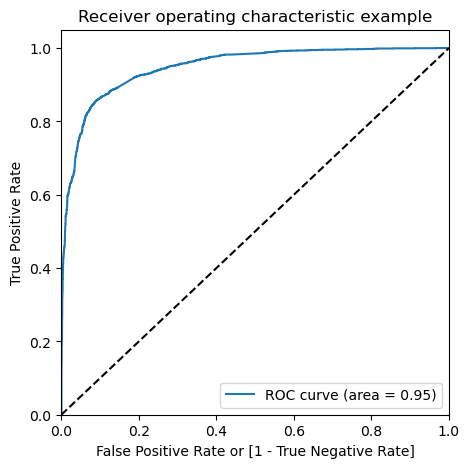

In [184]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [185]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0    1.708376e-10         7962          0    1    0    0    0    0   
1          0    9.135658e-02         5520          0    1    0    0    0    0   
2          0    2.170079e-03         1962          0    1    0    0    0    0   
3          1    9.777736e-01         1566          1    1    1    1    1    1   
4          0    2.842224e-01         9170          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    1  
4    0    0    0    0    0

In [186]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.771500  0.966515  0.652163
0.2   0.2  0.818424  0.941711  0.742980
0.3   0.3  0.873980  0.887143  0.865925
0.4   0.4  0.889203  0.857379  0.908677
0.5   0.5  0.891086  0.829268  0.928915
0.6   0.6  0.885436  0.791649  0.942828
0.7   0.7  0.870370  0.724680  0.959524
0.8   0.8  0.842122  0.618437  0.979003
0.9   0.9  0.809165  0.513849  0.989881


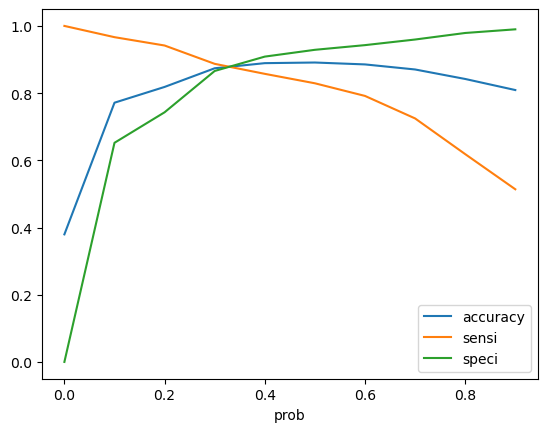

In [187]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.375 is the optimum point to take it as a cutoff probability.

In [188]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0    1.708376e-10         7962          0    1    0    0    0    0   
1          0    9.135658e-02         5520          0    1    0    0    0    0   
2          0    2.170079e-03         1962          0    1    0    0    0    0   
3          1    9.777736e-01         1566          1    1    1    1    1    1   
4          0    2.842224e-01         9170          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    1                1  
4    0    0    0    0    0                0

#### Assigning Lead Score

In [189]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0    1.708376e-10         7962          0    1    0    0    0    0   
1          0    9.135658e-02         5520          0    1    0    0    0    0   
2          0    2.170079e-03         1962          0    1    0    0    0    0   
3          1    9.777736e-01         1566          1    1    1    1    1    1   
4          0    2.842224e-01         9170          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0           0  
1    0    0    0    0    0                0           9  
2    0    0    0    0    0                0           0  
3    1    1    1    1    1                1          98  
4    0    0    0    0    0                0          28

In [190]:
y_train_pred_final[['Converted','Lead_Score']]

Converted  Lead_Score
0             0           0
1             0           9
2             0           0
3             1          98
4             0          28
...         ...         ...
6367          0          15
6368          1          79
6369          1         100
6370          1          94
6371          0           0

[6372 rows x 2 columns]

In [191]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8879472693032016

In [192]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3577,  376],
       [ 338, 2081]], dtype=int64)

In [193]:
TP = confusion2[1,1] # true positive TP
TN = confusion2[0,0] # true negatives TN
FP = confusion2[0,1] # false positives FP
FN = confusion2[1,0] # false negatives FN

In [194]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8602728400165358

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.9048823678219075

In [196]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09511763217809259


In [197]:
# Positive predictive value 
print (TP / float(TP+FP))

0.846967846967847


In [198]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9136653895274585


## Precision and Recall

In [199]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3672,  281],
       [ 413, 2006]], dtype=int64)

##### Precision
TP / TP + FP

In [200]:
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.8771316134674245

##### Recall
TP / TP + FN

In [201]:
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.8292682926829268

#### F1 Score
F = 2 * [(precision*recall)/(precision+recall)]

In [202]:
f1_score = 2 * (precision*recall)/(precision+recall)
f1_score

0.8525286867828303

Using sklearn utilities for the same

In [203]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8771316134674245

In [204]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8292682926829268

### Precision and recall tradeoff

In [205]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [206]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

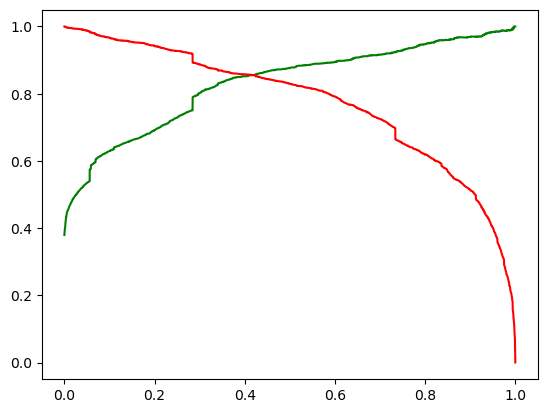

In [207]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [208]:
scale_list = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[scale_list] = scaler.transform(X_test[scale_list])

In [209]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3504             0                    -0.103815   
4050             0                    -0.881052   
7201             1                     0.424120   
1196             0                    -0.105648   
8219             0                    -0.428274   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Import  \
3504                                    1                        0   
4050                                    0                        0   
7201                                    1                        0   
1196                                    1                        0   
8219                                    1                        0   

      Lead Source_Olark Chat  Lead Source_Reference  \
3504                       0                      0   
4050                       0                      1   
7201                       0                      0   
1196                       0                      0   
8219                       0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
3504                           0                         0   
4050                           0                         0   
7201                           0                         0   
1196                           0                         0   
8219                           0                         0   

      Lead Source_Welingak Website  Lead Source_blog  ...  \
3504                             0                 0  ...   
4050                             0                 0  ...   
7201                             0                 0  ...   
1196                             0                 0  ...   
8219                             0                 0  ...   

      Tags_wrong number given  City_Tier II Cities  \
3504                        0                    0   
4050                        0                    0   
7201                        0                    0   
1196                        0                    0   
8219                        0                    0   

      Last Notable Activity_Email Bounced  \
3504                                    0   
4050                                    0   
7201                                    0   
1196                                    0   
8219                                    0   

      Last Notable Activity_Email Link Clicked  \
3504                                         0   
4050                                         0   
7201                                         0   
1196                                         0   
8219                                         0   

      Last Notable Activity_Had a Phone Conversation  \
3504                                               0   
4050                                               0   
7201                                               0   
1196                                               0   
8219                                               0   

      Last Notable Activity_Modified  \
3504                               0   
4050                               0   
7201                               0   
1196                               0   
8219                               0   

      Last Notable Activity_Olark Chat Conversation  \
3504                                              0   
4050                                              0   
7201                                              0   
1196                                              0   
8219                                              0   

      Last Notable Activity_Page Visited on Website  \
3504                                              0   
4050                                              0   
7201                                              0   
1196                                              0   
8219                                              1   

      Last Notable Activity_Unreachable  Last Notable Activity_Unsubsc

In [210]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [211]:
y_test_pred = res.predict(X_test_sm)

In [212]:
y_test_pred[:10]

3504    5.279689e-03
4050    9.863674e-01
7201    1.517433e-11
1196    5.268887e-03
8219    9.580400e-01
8747    2.842224e-01
9048    7.004977e-01
6524    5.177491e-02
7693    4.741629e-12
8187    2.969368e-01
dtype: float64

In [213]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [214]:
# Let's see the head
y_pred_1.head()

0
3504  5.279689e-03
4050  9.863674e-01
7201  1.517433e-11
1196  5.268887e-03
8219  9.580400e-01

In [215]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [216]:
# Putting ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [217]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [218]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [219]:
y_pred_final.head()

Converted  Prospect ID             0
0          0         3504  5.279689e-03
1          1         4050  9.863674e-01
2          0         7201  1.517433e-11
3          0         1196  5.268887e-03
4          1         8219  9.580400e-01

In [220]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [221]:
# Let's see the head of y_pred_final
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          0         3504    5.279689e-03
1          1         4050    9.863674e-01
2          0         7201    1.517433e-11
3          0         1196    5.268887e-03
4          1         8219    9.580400e-01

In [222]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [223]:
# calculating Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [224]:
y_pred_final.head()

Converted  Prospect ID  Converted_Prob  final_predicted  Lead_Score
0          0         3504    5.279689e-03                0           1
1          1         4050    9.863674e-01                1          99
2          0         7201    1.517433e-11                0           0
3          0         1196    5.268887e-03                0           1
4          1         8219    9.580400e-01                1          96

In [225]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8864884657634566

In [226]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1538,  151],
       [ 159,  883]], dtype=int64)

In [227]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8474088291746641

In [229]:
# Let us calculate specificity
TN / float(TN+FP)

0.9105979869745412

In [230]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08940201302545885


In [231]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8539651837524178


In [232]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9063052445492045


# Key Findings:

## On Training Model:    
<u><b>1.Accuracy ----- 0.8879 i,e 89% </b></u>

<u><b>2.Calculate Metrics beyond simply accuracy.</b></u>

i).Sensitivity -- 0.8602 i,e 86%

ii).Specificity -- 0.9047 i,e 90%

iii).False Positive rate -- 0.095

iv).Positive Predictive Value -- 0.8469

v).Negative Predictive value -- 0.9136

<u><b>3.Precision And Recall</b></u>

i).Precision (TP/TP+FP) -- 0.8771

ii).Recall (TP/TP  + FN) -- 0.8292

iii).F1-Score -- 0.8525 i,e 85%.


## On Testing Model:

<u><b>1.Calculate Accuracy.-------0.8864 i,e 88%</b></u>

<u><b>2.Calculate Metrics beyond simply accuracy.</b></u>

i).Sensitivity -- 0.8474 i,e 84%

ii).Specificity -- 0.9105 i,e 91%

iii).False Positive rate -- 0.089

iv).Positive Predictive Value -- 0.8539

v).Negative Predictive value -- 0.9063

#### Also calculated the <u>Assigned Lead Score</u> on both Train and Test Model